In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
data = pd.read_excel('/content/drive/MyDrive/CAPSTONE/CAPSTONE_PROJECT/0_dataset/2_CLEANED DATASET/EDA_CLEANED DATASET.xlsx')

In [5]:
df = data.copy()

In [6]:
df.isnull().sum().sum()

np.int64(599742)

In [7]:
# rows where any column has a null value
null_rows = df[df.isnull().any(axis=1)]
null_rows.head(5)

Report Number Local Case Number               Agency Name  \
0   MCP3126006X         250037402  Montgomery_County_Police   
1   MCP2349001B         250037516  Montgomery_County_Police   
2   MCP296500BC         250033157  Montgomery_County_Police   
3   MCP2159003K         250037509  Montgomery_County_Police   
4   MCP312900D6         250034573  Montgomery_County_Police   

        ACRS Report Type     Crash Date/Time            Route Type  \
0           Injury Crash 2025-08-21 17:21:00  Maryland_State_Route   
1  Property Damage Crash 2025-08-22 10:44:00      Interstate_Route   
2  Property Damage Crash 2025-07-25 11:55:00         Bicycle_Route   
3  Property Damage Crash 2025-08-22 10:36:00  Maryland_State_Route   
4  Property Damage Crash 2025-08-03 14:10:00                   NaN   

                 Road Name  \
0                      NaN   
1  EISENHOWER MEMORIAL HWY   
2                      NaN   
3                      NaN   
4                      NaN   

                                                   Cross-Street Name  \
0                                                                NaN   
1                                                                NaN   
2  NEW HAMPSHIRE AVE (SB/L) NORBECK RD (WB/L) SPENCERVILLE RD (WB/L)   
3                                                                NaN   
4                                                                NaN   

               Collision Type Weather Surface Condition     Light  \
0   Rear-End (Same Direction)   Clear               Dry  Daylight   
1              Single Vehicle   Clear               Dry  Daylight   
2  Sideswipe (Same Direction)   Clear               Dry  Daylight   
3   Rear-End (Same Direction)   Clear               Dry  Daylight   
4                Rear vs Side   Clear               NaN  Daylight   

           Traffic Control Driver Substance Abuse  \
0               No Control          None Detected   
1               No Control                    NaN   
2           Traffic Signal          None Detected   
3  Flashing Traffic Signal          None Detected   
4                      NaN                    NaN   

                              Person ID Driver At Fault     Injury Severity  \
0  BB3CB0F3-5A89-45FB-9516-48DDDB92B0A9             Yes  No Apparent Injury   
1  9B84E695-215A-447E-8AA6-D3958187BBCA              No                 NaN   
2  1D28ADF4-0DB2-4CBC-BDB0-1C1F5E7CF955              No  No Apparent Injury   
3  AE9A3389-3486-4199-B8F6-015D7D2E1139             Yes  No Apparent Injury   
4  3B4FB53F-9543-48EA-8C28-14AC093FBC36              No                 NaN   

      Driver Distracted By Drivers License State  \
0        Other Distraction                    MD   
1                      NaN                   NaN   
2           Not Distracted                    CO   
3  Cell Phone (Manual Use)                    MD   
4                      NaN                   NaN   

                             Vehicle ID Vehicle Damage Extent  \
0  768C98FA-C137-47BC-BE44-EE3BA4B95F66           Superficial   
1  BC322ECD-006B-4919-AAF8-3F64D934B789  Vehicle Not at Scene   
2  1F4EBE18-DB94-4CA7-8D9A-88C30E90400D           Superficial   
3  AAEB6B5A-30B2-47D3-BF59-7F14D0A5BCAD             Disabling   
4  B683B035-8C9F-45F7-BDB5-F9141CCF160D  Vehicle Not at Scene   

  Vehicle First Impact Location              Vehicle Body Type  \
0                Twelve O Clock                   PassengerCar   
1             VehicleNotAtScene                            NaN   
2                 Seven O Clock                   PassengerCar   
3                Twelve O Clock  Van - Passenger (&lt;9 Seats)   
4             VehicleNotAtScene            SportUtilityVehicle   

      Vehicle Movement Vehicle Going Dir  Speed Limit Driverless Vehicle  \
0  MovingConstantSpeed        Northbound           40                 No   
1  MovingConstantSpeed        Northbound           55                 No   
2  MovingConstantSpeed         Westbound          

In [8]:
missing_column = (df.isnull().sum() / len(df))* 100
missing_column=missing_column.sort_values(ascending=False)
missing_column

Circumstance_Category            81.662361
Vehicle Model                    44.393521
Driver Substance Abuse           22.881302
Driver Distracted By             20.966824
Vehicle Make                     20.014207
Cross-Street Name                18.054968
Traffic Control                  14.038698
Surface Condition                11.642559
Road Name                        11.330696
Route Type                        9.798140
Weather                           6.942721
Drivers License State             6.692161
Vehicle Going Dir                 4.162227
Agency Name                       3.814848
Vehicle Damage Extent             3.374542
Vehicle Year                      2.558152
Vehicle Movement                  2.108116
Vehicle Body Type                 2.094006
Vehicle First Impact Location     1.575370
Light                             1.101494
Injury Severity                   1.085439
Collision Type                    0.755088
Parked Vehicle                    0.742438
Report Number                     0.000000
Local Case Number                 0.000000
ACRS Report Type                  0.000000
Person ID                         0.000000
Driver At Fault                   0.000000
Crash Date/Time                   0.000000
Vehicle ID                        0.000000
Speed Limit                       0.000000
Driverless Vehicle                0.000000
Longitude                         0.000000
Latitude                          0.000000
dtype: float64

In [9]:
high_null_columns = missing_column[missing_column > 0]
high_null_columns.head()

Circumstance_Category     81.662361
Vehicle Model             44.393521
Driver Substance Abuse    22.881302
Driver Distracted By      20.966824
Vehicle Make              20.014207
dtype: float64

## We are starting null value treatmen from the columns having the least null entries

In [10]:
null_free_columns = df[['Report Number', 'Local Case Number', 'ACRS Report Type',
       'Driver At Fault', 'Person ID', 'Crash Date/Time', 'Vehicle ID',
       'Speed Limit', 'Driverless Vehicle', 'Latitude', 'Longitude']]

null_free_columns.head()

Report Number Local Case Number       ACRS Report Type Driver At Fault  \
0   MCP3126006X         250037402           Injury Crash             Yes   
1   MCP2349001B         250037516  Property Damage Crash              No   
2   MCP296500BC         250033157  Property Damage Crash              No   
3   MCP2159003K         250037509  Property Damage Crash             Yes   
4   MCP312900D6         250034573  Property Damage Crash              No   

                              Person ID     Crash Date/Time  \
0  BB3CB0F3-5A89-45FB-9516-48DDDB92B0A9 2025-08-21 17:21:00   
1  9B84E695-215A-447E-8AA6-D3958187BBCA 2025-08-22 10:44:00   
2  1D28ADF4-0DB2-4CBC-BDB0-1C1F5E7CF955 2025-07-25 11:55:00   
3  AE9A3389-3486-4199-B8F6-015D7D2E1139 2025-08-22 10:36:00   
4  3B4FB53F-9543-48EA-8C28-14AC093FBC36 2025-08-03 14:10:00   

                             Vehicle ID  Speed Limit Driverless Vehicle  \
0  768C98FA-C137-47BC-BE44-EE3BA4B95F66           40                 No   
1  BC322ECD-006B-4919-AAF8-3F64D934B789           55                 No   
2  1F4EBE18-DB94-4CA7-8D9A-88C30E90400D           40                 No   
3  AAEB6B5A-30B2-47D3-BF59-7F14D0A5BCAD           30                 No   
4  B683B035-8C9F-45F7-BDB5-F9141CCF160D            0                 No   

    Latitude  Longitude  
0  39.219796 -77.257416  
1  39.180181 -77.250657  
2  39.121219 -76.988905  
3  39.207931 -77.141480  
4  39.039662 -77.057238

## 1. Parked Vehicle null-treatment

In [11]:
df['Parked Vehicle'].isnull().sum()

np.int64(1526)

In [12]:
df['Parked Vehicle'].value_counts()

Parked Vehicle
No     200634
Yes      3379
Name: count, dtype: int64

In [13]:
# 1. Driverless vehicle implies parked
df.loc[
    (df['Parked Vehicle'].isna()) &
    (df['Driverless Vehicle'] == 'Yes'),
    'Parked Vehicle'
] = 'Yes'

# 2. Not at fault + stationary road → parked
df.loc[
    (df['Parked Vehicle'].isna()) &
    (df['Driver At Fault'] == 'No') &
    (df['Speed Limit'] == 0),
    'Parked Vehicle'
] = 'Yes'

# 3. At fault + moving → not parked
df.loc[
    (df['Parked Vehicle'].isna()) &
    (df['Driver At Fault'] == 'Yes') &
    (df['Speed Limit'] > 0),
    'Parked Vehicle'
] = 'No'

# 4. Moving crash + speed limit → not parked
df.loc[
    (df['Parked Vehicle'].isna()) &
    (df['ACRS Report Type'].str.contains('Damage Crash')) &
    (df['Speed Limit'] > 0),
    'Parked Vehicle'
] = 'No'

# 5. Fill remaining missing values with mode (most frequent)
df['Parked Vehicle'].fillna(df['Parked Vehicle'].mode()[0], inplace=True)

In [14]:
df['Parked Vehicle'].isnull().sum()

np.int64(0)

In [15]:
df['Parked Vehicle'].value_counts()

Parked Vehicle
No     202057
Yes      3482
Name: count, dtype: int64

## 2. Collision Type null-treatment

In [16]:
df['Collision Type'].isnull().sum()

np.int64(1552)

In [17]:
df['Collision Type'].value_counts(normalize=True)*100

Collision Type
Rear-End (Same Direction)               32.244702
Angle Collision                         18.237437
Sideswipe (Same Direction)              10.502140
Other                                   10.342816
Single Vehicle                           9.691794
Head-On + Left Turn                      6.336678
Head-On                                  2.795766
Right Turn (Same Direction)              2.231515
Left Turn (Same Direction)               2.185433
Sideswipe (Opposite Direction)           2.011403
Angle + Left Turn                        0.996632
Rear vs Side                             0.785344
Angle + Right Turn                       0.590234
Both Left Turns (Same Direction)         0.352473
Angle + Head-On                          0.343159
Back-to-Back                             0.194620
Both Left Turns (Opposite Direction)     0.157853
Name: proportion, dtype: float64

In [18]:
# 1. Parked vehicle → rear-end or similar
df.loc[
    (df['Collision Type'].isna()) &
    (df['Parked Vehicle'] == 'Yes'),
    'Collision Type'
] = 'Rear-End (Same Direction)'

# 2. Single-vehicle crash → mark as Single Vehicle
df.loc[
    (df['Collision Type'].isna()) &
    (df['ACRS Report Type'].str.contains('Single', case=False)),
    'Collision Type'
] = 'Single Vehicle'

# 3. At-fault driver → likely rear-end
df.loc[
    (df['Collision Type'].isna()) &
    (df['Driver At Fault'] == 'Yes'),
    'Collision Type'
] = 'Rear-End (Same Direction)'

# 4. High speed straight crashes → Head-On (fallback rule)
df.loc[
    (df['Collision Type'].isna()) &
    (df['Speed Limit'] >= 40),
    'Collision Type'
] = 'Head-On'

# 5. Fill remaining nulls with mode
df['Collision Type'].fillna(df['Collision Type'].mode()[0], inplace=True)

In [19]:
df['Collision Type'].isnull().sum()

np.int64(0)

In [20]:
df['Collision Type'].value_counts(normalize=True)*100

Collision Type
Rear-End (Same Direction)               32.713986
Angle Collision                         18.099728
Sideswipe (Same Direction)              10.422839
Other                                   10.264719
Single Vehicle                           9.618613
Head-On + Left Turn                      6.288831
Head-On                                  2.816984
Right Turn (Same Direction)              2.214665
Left Turn (Same Direction)               2.168931
Sideswipe (Opposite Direction)           1.996215
Angle + Left Turn                        0.989107
Rear vs Side                             0.779414
Angle + Right Turn                       0.585777
Both Left Turns (Same Direction)         0.349812
Angle + Head-On                          0.340568
Back-to-Back                             0.193151
Both Left Turns (Opposite Direction)     0.156661
Name: proportion, dtype: float64

## 3. Injury Severity null-treatment

In [21]:
df['Injury Severity'].isnull().sum()

np.int64(2231)

In [22]:
df['Injury Severity'].value_counts(normalize=True)*100

Injury Severity
No Apparent Injury          82.108427
Possible Injury              9.718752
Suspected Minor Injury       7.251067
Suspected Serious Injury     0.830267
Fatal Injury                 0.091487
Name: proportion, dtype: float64

In [23]:
# A. Parked → No Injury
df.loc[
    (df['Injury Severity'].isna()) &
    (df['Parked Vehicle'] == 'Yes'),
    'Injury Severity'
] = 'No Apparent Injury'

# B. Rear-End → possible mild injuries
df.loc[
    (df['Injury Severity'].isna()) &
    (df['Collision Type'] == 'Rear-End (Same Direction)'),
    'Injury Severity'
] = 'Possible Injury'

# C. Head-On / Angle → serious injury
df.loc[
    (df['Injury Severity'].isna()) &
    (df['Collision Type'].str.contains('Head-On|Angle', case=False, na=False)),
    'Injury Severity'
] = 'Suspected Serious Injury'

# D. High speed → Minor Injury
df.loc[
    (df['Injury Severity'].isna()) &
    (df['Speed Limit'] >= 50),
    'Injury Severity'
] = 'Suspected Minor Injury'

# E. Single-vehicle crash → Minor Injury
df.loc[
    (df['Injury Severity'].isna()) &
    (df['Collision Type'] == 'Single Vehicle'),
    'Injury Severity'
] = 'Suspected Minor Injury'

# F. Remaining → probabilistic filling (using your actual value counts)
import numpy as np

severity_labels = [
    'No Apparent Injury',
    'Possible Injury',
    'Suspected Minor Injury',
    'Suspected Serious Injury',
    'Fatal Injury'
]

severity_probs = [
    0.82108427,
    0.09718752,
    0.07251067,
    0.00830267,
    0.00091487
]

mask = df['Injury Severity'].isna()

df.loc[mask, 'Injury Severity'] = np.random.choice(
    severity_labels, size=mask.sum(), p=severity_probs
)

In [24]:
df['Injury Severity'].isnull().sum()

np.int64(0)

In [25]:
df['Injury Severity'].value_counts(normalize=True)*100

Injury Severity
No Apparent Injury          81.641927
Possible Injury              9.970371
Suspected Minor Injury       7.338267
Suspected Serious Injury     0.958942
Fatal Injury                 0.090494
Name: proportion, dtype: float64

## 4. Light null-treatment

In [26]:
df['Light'].isnull().sum()

np.int64(2264)

In [27]:
df['Light'].value_counts(normalize=True)*100

Light
Daylight                   68.832370
Dark - Lighted             23.053499
Dark - Not Lighted          3.000861
Dusk                        2.148813
Dawn                        1.875784
Dark - Unknown Lighting     0.871234
Other                       0.217439
Name: proportion, dtype: float64

In [28]:
# get crash hour
df['hour'] = pd.to_datetime(df['Crash Date/Time']).dt.hour

# daylight hours
df.loc[(df['Light'].isna()) & (6 <= df['hour']) & (df['hour'] <= 18), 'Light'] = 'Daylight'

# night hours with street lights
df.loc[(df['Light'].isna()) & (df['hour'].isin([19,20,21,22,23,0,1,2,3,4,5])),
       'Light'] = 'Dark - Lighted'

# serious/fatal crashes → dark unlit
df.loc[(df['Light'].isna()) &
       (df['Injury Severity'].isin(['Suspected Serious Injury','Fatal Injury'])),
       'Light'] = 'Dark - Not Lighted'

# head-on / angle → dark unlit
df.loc[(df['Light'].isna()) &
       (df['Collision Type'].str.contains('Head-On|Angle', na=False)),
       'Light'] = 'Dark - Not Lighted'

# parked vehicle → usually daylight
df.loc[(df['Light'].isna()) & (df['Parked Vehicle'] == 'Yes'), 'Light'] = 'Daylight'

# rear-end → mostly daylight
df.loc[(df['Light'].isna()) &
       (df['Collision Type'] == 'Rear-End (Same Direction)'),
       'Light'] = 'Daylight'

# high-speed rural → dark unlit
df.loc[(df['Light'].isna()) & (df['Speed Limit'] >= 50), 'Light'] = 'Dark - Not Lighted'

# dawn and dusk by hour
df.loc[(df['Light'].isna()) & (df['hour'].isin([5, 6])), 'Light'] = 'Dawn'
df.loc[(df['Light'].isna()) & (df['hour'].isin([18, 19])), 'Light'] = 'Dusk'

# fill remaining by actual proportions
light_labels = ['Daylight','Dark - Lighted','Dark - Not Lighted','Dusk','Dawn','Dark - Unknown Lighting','Other']
light_probs  = [0.68832370,0.23053499,0.03000861,0.02148813,0.01875784,0.00871234,0.00217439]

mask = df['Light'].isna()
df.loc[mask, 'Light'] = np.random.choice(light_labels, size=mask.sum(), p=light_probs)


In [29]:
df['Light'].isnull().sum()

np.int64(0)

In [30]:
df['Light'].value_counts(normalize=True)*100

Light
Daylight                   68.860897
Dark - Lighted             23.114348
Dark - Not Lighted          2.967807
Dusk                        2.125144
Dawn                        1.855122
Dark - Unknown Lighting     0.861637
Other                       0.215044
Name: proportion, dtype: float64

## 5. Vehicle First Impact Location null-treatment

In [31]:
df['Vehicle First Impact Location'].isnull().sum()

np.int64(3238)

In [32]:
df['Vehicle First Impact Location'].value_counts(normalize=True)*100

Vehicle First Impact Location
Twelve O Clock       38.481767
Six O Clock          19.267329
One O Clock           9.774544
Eleven O Clock        8.528875
Ten O Clock           3.742938
Two O Clock           3.722671
Seven O Clock         2.695983
Five O Clock          2.521490
Four O Clock          2.462667
Eight O Clock         2.233306
Nine O Clock          2.197221
Three O Clock         2.196727
VehicleNotAtScene     1.174982
NonCollision          0.376666
Underside             0.329707
RoofTop               0.276815
CargoLoss             0.016312
Name: proportion, dtype: float64

In [33]:
# parked vehicle → usually hit from rear
df.loc[(df['Vehicle First Impact Location'].isna()) &
       (df['Parked Vehicle'] == 'Yes'),
       'Vehicle First Impact Location'] = 'Six O Clock'

# rear-end crash → 6 o'clock (rear)
df.loc[(df['Vehicle First Impact Location'].isna()) &
       (df['Collision Type'] == 'Rear-End (Same Direction)'),
       'Vehicle First Impact Location'] = 'Six O Clock'

# head-on crash → 12 o'clock (front)
df.loc[(df['Vehicle First Impact Location'].isna()) &
       (df['Collision Type'].str.contains('Head-On', na=False)),
       'Vehicle First Impact Location'] = 'Twelve O Clock'

# angle/side crash → 3 or 9 o'clock (side)
df.loc[(df['Vehicle First Impact Location'].isna()) &
       (df['Collision Type'].str.contains('Angle', na=False)),
       'Vehicle First Impact Location'] = 'Three O Clock'

# high-speed / rural → often front impact
df.loc[(df['Vehicle First Impact Location'].isna()) &
       (df['Speed Limit'] >= 50),
       'Vehicle First Impact Location'] = 'Twelve O Clock'

# serious/fatal injury → strong front impact common
df.loc[(df['Vehicle First Impact Location'].isna()) &
       (df['Injury Severity'].isin(['Suspected Serious Injury','Fatal Injury'])),
       'Vehicle First Impact Location'] = 'Twelve O Clock'

# dark unlit → more side/rear crashes (visibility issue)
df.loc[(df['Vehicle First Impact Location'].isna()) &
       (df['Light'] == 'Dark - Not Lighted'),
       'Vehicle First Impact Location'] = 'Nine O Clock'

# daylight → more front impacts (visibility + traffic braking)
df.loc[(df['Vehicle First Impact Location'].isna()) &
       (df['Light'] == 'Daylight'),
       'Vehicle First Impact Location'] = 'Twelve O Clock'
impact_labels = [
    'Twelve O Clock','Six O Clock','One O Clock','Eleven O Clock','Ten O Clock',
    'Two O Clock','Seven O Clock','Five O Clock','Four O Clock','Eight O Clock',
    'Nine O Clock','Three O Clock','VehicleNotAtScene','NonCollision',
    'Underside','RoofTop','CargoLoss'
]

# Fallback Using Exact Proportions

impact_probs = [
    0.38481767,0.19267329,0.09774544,0.08528875,0.03742938,
    0.03722671,0.02695983,0.02521490,0.02462667,0.02233306,
    0.02197221,0.02196727,0.01174982,0.00376666,
    0.00329707,0.00276815,0.00016312
]

mask = df['Vehicle First Impact Location'].isna()

df.loc[mask, 'Vehicle First Impact Location'] = np.random.choice(
    impact_labels,
    size=mask.sum(),
    p=impact_probs
)


In [34]:
df['Vehicle First Impact Location'].value_counts(normalize=True)*100

Vehicle First Impact Location
Twelve O Clock       38.745931
Six O Clock          19.426970
One O Clock           9.650237
Eleven O Clock        8.418840
Ten O Clock           3.696622
Two O Clock           3.674728
Seven O Clock         2.661295
Five O Clock          2.490525
Four O Clock          2.431169
Three O Clock         2.261858
Eight O Clock         2.205907
Nine O Clock          2.192771
VehicleNotAtScene     1.158418
NonCollision          0.370733
Underside             0.324999
RoofTop               0.272941
CargoLoss             0.016055
Name: proportion, dtype: float64

• Parked → rear (6 o'clock)  
• Rear-end → 6 o'clock  
• Head-on → 12 o'clock  
• Angle crash → 3 o'clock  
• High speed → 12 o'clock  
• Serious injury → 12 o'clock  
• Dark unlit → 9 o'clock  
• Daylight → 12 o'clock  
• Remaining → filled using actual data proportions  


## 6.Vehicle Body Type

In [35]:
df['Vehicle Body Type'].value_counts(normalize=True)*100


Vehicle Body Type
PassengerCar                     69.889930
SportUtilityVehicle              10.588118
PickupTruck                       4.224414
Van                               2.463786
TransitBus                        2.227744
SchoolBus                         1.855045
PoliceVehicleNonEmergency         1.052998
OtherLightTruck                   0.948642
CargoVanLightTruck2Axle           0.923299
Other                             0.919323
PoliceVehicleEmergency            0.743906
MediumHeavyTruck3Axle             0.729992
StationWagon                      0.445251
Motorcycle                        0.441772
Van - Passenger (&lt;9 Seats)     0.373196
TruckTractor                      0.310085
AmbulanceEmergency                0.231570
OtherBus                          0.222128
FireVehicleEmergency              0.217159
OtherTruck                        0.213184
FireVehicleNonEmergency           0.147092
SingleUnitTruck                   0.131190
VanCargo                          0.100380
RecreationalVehicle               0.097895
Motorcycle2Wheeled                0.092429
AmbulanceNonEmergency             0.091932
ATV                               0.078515
Moped                             0.068577
Snowmobile                        0.064104
Autocycle                         0.022859
LowSpeedVehicle                   0.019380
CrossCountryBus                   0.016896
FarmVehicle                       0.010436
ConstructionEquipment             0.009442
MiniBus                           0.008945
Limousine                         0.007951
RecreationalOffHighwayVehicle     0.003479
VanPassenger9to12                 0.001988
FarmEquipment                     0.001491
Motorcycle3Wheeled                0.001491
VanPassenger15                    0.001491
GolfCart                          0.000497
Name: proportion, dtype: float64

In [36]:
df['Vehicle Body Type'].isnull().sum()

np.int64(4304)

In [37]:
# parked vehicle → mostly passenger cars
df.loc[(df['Vehicle Body Type'].isna()) &
       (df['Parked Vehicle'] == 'Yes'),
       'Vehicle Body Type'] = 'PassengerCar'

# rear-end crash → often passenger cars or SUVs
df.loc[(df['Vehicle Body Type'].isna()) &
       (df['Collision Type'] == 'Rear-End (Same Direction)'),
       'Vehicle Body Type'] = 'PassengerCar'

# head-on crash → higher chance of larger vehicles (SUV / Pickup)
df.loc[(df['Vehicle Body Type'].isna()) &
       (df['Collision Type'].str.contains('Head-On', na=False)),
       'Vehicle Body Type'] = 'SportUtilityVehicle'

# angle crash → many SUV / Pickup
df.loc[(df['Vehicle Body Type'].isna()) &
       (df['Collision Type'].str.contains('Angle', na=False)),
       'Vehicle Body Type'] = 'PickupTruck'

# serious or fatal injury → often larger vehicles involved
df.loc[(df['Vehicle Body Type'].isna()) &
       (df['Injury Severity'].isin(['Suspected Serious Injury','Fatal Injury'])),
       'Vehicle Body Type'] = 'SportUtilityVehicle'

# high-speed rural → pickups & trucks more common
df.loc[(df['Vehicle Body Type'].isna()) &
       (df['Speed Limit'] >= 50),
       'Vehicle Body Type'] = 'PickupTruck'

# dark unlit → more large-vehicle involvement (visibility issue)
df.loc[(df['Vehicle Body Type'].isna()) &
       (df['Light'] == 'Dark - Not Lighted'),
       'Vehicle Body Type'] = 'SportUtilityVehicle'

# daylight → most common: passenger car
df.loc[(df['Vehicle Body Type'].isna()) &
       (df['Light'] == 'Daylight'),
       'Vehicle Body Type'] = 'PassengerCar'

# Proportion Imputation using np.choice
# labels and raw proportions from your data
body_labels = [
    'PassengerCar','SportUtilityVehicle','PickupTruck','Van','TransitBus','SchoolBus',
    'PoliceVehicleNonEmergency','OtherLightTruck','CargoVanLightTruck2Axle','Other',
    'PoliceVehicleEmergency','MediumHeavyTruck3Axle','StationWagon','Motorcycle',
    'Van - Passenger (<9 Seats)','TruckTractor','AmbulanceEmergency','OtherBus',
    'FireVehicleEmergency','OtherTruck','FireVehicleNonEmergency','SingleUnitTruck',
    'VanCargo','RecreationalVehicle','Motorcycle2Wheeled','AmbulanceNonEmergency',
    'ATV','Moped','Snowmobile','Autocycle','LowSpeedVehicle','CrossCountryBus',
    'FarmVehicle','ConstructionEquipment','MiniBus','Limousine',
    'RecreationalOffHighwayVehicle','VanPassenger9to12','FarmEquipment',
    'Motorcycle3Wheeled','VanPassenger15','GolfCart'
]

body_probs_raw = [
    69.889930,10.588118,4.224414,2.463786,2.227744,1.855045,
    1.052998,0.948642,0.923299,0.919323,0.743906,0.729992,
    0.445251,0.441772,0.373196,0.310085,0.231570,0.222128,
    0.217159,0.213184,0.147092,0.131190,0.100380,0.097895,
    0.092429,0.091932,0.078515,0.068577,0.064104,0.022859,
    0.019380,0.016896,0.010436,0.009442,0.008945,0.007951,
    0.003479,0.001988,0.001491,0.001491,0.001491,0.000497
]

# normalize to sum=1  (PREVENTS all ValueError issues)
body_probs = np.array(body_probs_raw) / np.sum(body_probs_raw)

mask = df['Vehicle Body Type'].isna()

df.loc[mask, 'Vehicle Body Type'] = np.random.choice(
    body_labels,
    size=mask.sum(),
    p=body_probs
)


In [38]:
df['Vehicle Body Type'].value_counts(normalize=True)*100

Vehicle Body Type
PassengerCar                     70.062616
SportUtilityVehicle              10.543011
PickupTruck                       4.368514
Van                               2.417546
TransitBus                        2.188392
SchoolBus                         1.820579
PoliceVehicleNonEmergency         1.034840
OtherLightTruck                   0.930237
CargoVanLightTruck2Axle           0.907370
Other                             0.903965
PoliceVehicleEmergency            0.731248
MediumHeavyTruck3Axle             0.717139
StationWagon                      0.437873
Motorcycle                        0.434467
Van - Passenger (&lt;9 Seats)     0.365381
TruckTractor                      0.305052
AmbulanceEmergency                0.228181
OtherBus                          0.218450
FireVehicleEmergency              0.213098
OtherTruck                        0.209693
FireVehicleNonEmergency           0.144498
SingleUnitTruck                   0.128443
VanCargo                          0.098278
RecreationalVehicle               0.096332
Motorcycle2Wheeled                0.090494
AmbulanceNonEmergency             0.090007
ATV                               0.076871
Moped                             0.068114
Snowmobile                        0.063248
Autocycle                         0.022867
LowSpeedVehicle                   0.018975
CrossCountryBus                   0.017028
FarmVehicle                       0.010217
ConstructionEquipment             0.009244
MiniBus                           0.008757
Limousine                         0.007784
RecreationalOffHighwayVehicle     0.003406
VanPassenger9to12                 0.001946
FarmEquipment                     0.001460
VanPassenger15                    0.001460
Motorcycle3Wheeled                0.001460
Van - Passenger (<9 Seats)        0.000973
GolfCart                          0.000487
Name: proportion, dtype: float64

• Parked vehicle → Passenger Car  
• Rear-end → Passenger Car  
• Head-on → SUV  
• Angle crash → Pickup Truck  
• Serious/Fatal injury → SUV  
• High-speed rural → Pickup Truck  
• Dark unlit → SUV  
• Daylight → Passenger Car  
• Remaining → filled using actual body-type proportions  


In [39]:
df['Vehicle Body Type'].isnull().sum()

np.int64(0)

## 7. Vehicle Movement

In [40]:
df['Vehicle Movement'].value_counts(normalize=True) *100

Vehicle Movement
MovingConstantSpeed        39.882508
SlowingOrStopping          14.121348
StoppedInTrafficLane       10.530998
MakingLeftTurn             10.140354
Accelerating                5.879546
Backing                     3.541147
MakingRightTurn             3.341352
ChangingLanes               2.915420
StartingFromLane            2.239993
Parked                      1.699751
Parking                     0.961204
StartingFromParked          0.941821
EnteringTrafficLane         0.798187
MakingUTurn                 0.773834
Passing                     0.658529
NegotiatingCurve            0.477123
Other                       0.446309
Skidding                    0.342932
LeavingTrafficLane          0.156556
RightTurnOnRed              0.132700
DriverlessMovingVehicle     0.018389
Name: proportion, dtype: float64

In [41]:
# ---------- simple rule-based fills ----------
# parked → Parked
df.loc[(df['Vehicle Movement'].isna()) & (df['Parked Vehicle'] == 'Yes'),
       'Vehicle Movement'] = 'Parked'

# rear-end → MovingConstantSpeed or SlowingOrStopping
df.loc[(df['Vehicle Movement'].isna()) & (df['Collision Type'] == 'Rear-End (Same Direction)'),
       'Vehicle Movement'] = 'SlowingOrStopping'

# head-on → MovingConstantSpeed (straight travel)
df.loc[(df['Vehicle Movement'].isna()) & (df['Collision Type'].str.contains('Head-On', na=False)),
       'Vehicle Movement'] = 'MovingConstantSpeed'

# angle crash → MakingLeftTurn or MakingRightTurn
df.loc[(df['Vehicle Movement'].isna()) & (df['Collision Type'].str.contains('Angle', na=False)),
       'Vehicle Movement'] = 'MakingLeftTurn'

# impact from rear (Six O Clock) → Being hit while StoppedInTrafficLane or Parked
df.loc[(df['Vehicle Movement'].isna()) & (df['Vehicle First Impact Location'] == 'Six O Clock'),
       'Vehicle Movement'] = 'StoppedInTrafficLane'

# impact from front (Twelve O Clock) → MovingConstantSpeed or Accelerating
df.loc[(df['Vehicle Movement'].isna()) & (df['Vehicle First Impact Location'] == 'Twelve O Clock'),
       'Vehicle Movement'] = 'MovingConstantSpeed'

# backing impact / low-speed rear → Backing
df.loc[(df['Vehicle Movement'].isna()) & (df['Vehicle First Impact Location'].isin(['One O Clock','Eleven O Clock'])),
       'Vehicle Movement'] = 'Backing'

# high-speed rural → MovingConstantSpeed
df.loc[(df['Vehicle Movement'].isna()) & (df['Speed Limit'] >= 50),
       'Vehicle Movement'] = 'MovingConstantSpeed'

# dark unlit & serious injury → NegotiatingCurve or Skidding (loss of control)
df.loc[(df['Vehicle Movement'].isna()) &
       (df['Light'] == 'Dark - Not Lighted') &
       (df['Injury Severity'].isin(['Suspected Serious Injury','Fatal Injury'])),
       'Vehicle Movement'] = 'Skidding'

# parked lot maneuvers (impact location rooftop/underside/unusual) → Parking/StartingFromParked
df.loc[(df['Vehicle Movement'].isna()) &
       (df['Vehicle First Impact Location'].isin(['RoofTop','Underside'])),
       'Vehicle Movement'] = 'Parking'

# ---------- probabilistic fallback (normalize percentages) ----------
movement_labels = [
 'MovingConstantSpeed','SlowingOrStopping','StoppedInTrafficLane','MakingLeftTurn',
 'Accelerating','Backing','MakingRightTurn','ChangingLanes','StartingFromLane',
 'Parked','Parking','StartingFromParked','EnteringTrafficLane','MakingUTurn',
 'Passing','NegotiatingCurve','Other','Skidding','LeavingTrafficLane','RightTurnOnRed',
 'DriverlessMovingVehicle'
]

movement_probs_raw = [
 39.882508,14.121348,10.530998,10.140354,5.879546,3.541147,3.341352,2.915420,
 2.239993,1.699751,0.961204,0.941821,0.798187,0.773834,0.658529,0.477123,
 0.446309,0.342932,0.156556,0.132700,0.018389
]

# normalize to sum=1 to avoid ValueError
movement_probs = np.array(movement_probs_raw) / np.sum(movement_probs_raw)

mask = df['Vehicle Movement'].isna()
df.loc[mask, 'Vehicle Movement'] = np.random.choice(
    movement_labels, size=mask.sum(), p=movement_probs
)


In [42]:
df['Vehicle Movement'].isnull().sum()

np.int64(0)

In [43]:
df['Vehicle Movement'].value_counts(normalize=True) *100

Vehicle Movement
MovingConstantSpeed        39.753040
SlowingOrStopping          14.631287
StoppedInTrafficLane       10.373700
MakingLeftTurn             10.119247
Accelerating                5.767275
Backing                     3.724354
MakingRightTurn             3.275777
ChangingLanes               2.860771
StartingFromLane            2.199583
Parked                      1.669270
Parking                     0.968186
StartingFromParked          0.923426
EnteringTrafficLane         0.783306
MakingUTurn                 0.759953
Passing                     0.646106
NegotiatingCurve            0.468524
Other                       0.436900
Skidding                    0.338135
LeavingTrafficLane          0.153256
RightTurnOnRed              0.129902
DriverlessMovingVehicle     0.018001
Name: proportion, dtype: float64

## 8.Vehicle Year

In [44]:
df['Vehicle Year'].isnull().sum()

np.int64(5258)

In [45]:
df['Vehicle Year'].value_counts(normalize=True)*100

Vehicle Year
2015.0    6.931262
2016.0    6.683110
2014.0    6.682611
2013.0    6.269192
2017.0    5.664541
2012.0    5.308042
2011.0    4.739341
2018.0    4.415297
2008.0    4.380845
2007.0    4.376851
2010.0    4.183622
2006.0    4.040323
2009.0    3.794169
2019.0    3.750730
2005.0    3.506074
2004.0    3.306854
2003.0    2.883948
2020.0    2.682731
2002.0    2.283791
2021.0    2.168453
2001.0    1.842411
2000.0    1.743550
2022.0    1.691623
2023.0    1.258731
1999.0    1.156375
1998.0    0.863786
2024.0    0.800875
1997.0    0.675551
1996.0    0.424404
1995.0    0.328039
2025.0    0.266126
1994.0    0.230676
1993.0    0.159276
1992.0    0.109346
1991.0    0.084381
1990.0    0.083383
1989.0    0.059916
1988.0    0.046934
1987.0    0.036948
1986.0    0.020471
1985.0    0.018474
1983.0    0.009487
1984.0    0.007489
1978.0    0.005492
1980.0    0.004993
1982.0    0.004494
1974.0    0.002496
1977.0    0.001997
1981.0    0.001997
1972.0    0.001997
1975.0    0.001498
1979.0    0.001498
1970.0    0.001498
1971.0    0.000999
1976.0    0.000999
Name: proportion, dtype: float64

### Probability Based Imputation

In [46]:
import numpy as np

# labels and raw proportions from your table
year_labels = [
 2015,2016,2014,2013,2017,2012,2011,2018,2008,2007,
 2010,2006,2009,2019,2005,2004,2003,2020,2002,2021,
 2001,2000,2022,2023,1999,1998,2024,1997,1996,1995,
 2025,1994,1993,1992,1991,1990,1989,1988,1987,1986,
 1985,1983,1984,1978,1980,1982,1974,1977,1981,1972,
 1975,1979,1970,1971,1976
]

year_probs_raw = [
 6.931262,6.683110,6.682611,6.269192,5.664541,5.308042,4.739341,4.415297,4.380845,4.376851,
 4.183622,4.040323,3.794169,3.750730,3.506074,3.306854,2.883948,2.682731,2.283791,2.168453,
 1.842411,1.743550,1.691623,1.258731,1.156375,0.863786,0.800875,0.675551,0.424404,0.328039,
 0.266126,0.230676,0.159276,0.109346,0.084381,0.083383,0.059916,0.046934,0.036948,0.020471,
 0.018474,0.009487,0.007489,0.005492,0.004993,0.004494,0.002496,0.001997,0.001997,0.001997,
 0.001498,0.001498,0.001498,0.000999,0.000999
]

# normalize
year_probs = np.array(year_probs_raw) / np.sum(year_probs_raw)

# mask for missing values
mask = df['Vehicle Year'].isna()

# fill with random choice based on distribution
df.loc[mask, 'Vehicle Year'] = np.random.choice(
    year_labels,
    size=mask.sum(),
    p=year_probs
)

In [47]:
# ================================
# FIX VEHICLE YEAR (LOGICAL CORRECTION)
# Vehicle Year must NOT be newer than the crash year.
# ================================

import pandas as pd

# 1. Extract crash year
df['Crash_Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year

# 2. Identify incorrect entries where Vehicle Year > Crash Year
mask_invalid = df['Vehicle Year'] > df['Crash_Year']

# 3. Replace invalid Vehicle Year with the Crash Year
df.loc[mask_invalid, 'Vehicle Year'] = df.loc[mask_invalid, 'Crash_Year']

# 4. Drop helper column
df.drop(columns=['Crash_Year'], inplace=True)

df['Vehicle Year'].head(), mask_invalid.sum()

(0    2013.0
 1    2018.0
 2    2023.0
 3    2003.0
 4    2023.0
 Name: Vehicle Year, dtype: float64,
 np.int64(1181))

In [48]:
df['Vehicle Year'].isnull().sum()

np.int64(0)

In [49]:
df['Vehicle Year'].value_counts(normalize=True)*100

Vehicle Year
2015.0    7.025431
2016.0    6.742759
2014.0    6.661509
2013.0    6.254288
2017.0    5.667538
2012.0    5.308968
2011.0    4.730976
2018.0    4.428357
2008.0    4.387489
2007.0    4.378731
2010.0    4.174390
2006.0    4.028433
2009.0    3.791495
2019.0    3.741869
2005.0    3.523905
2004.0    3.324916
2003.0    2.872448
2020.0    2.635996
2002.0    2.298834
2021.0    2.163580
2001.0    1.838581
2000.0    1.746141
2022.0    1.658566
2023.0    1.253777
1999.0    1.159877
1998.0    0.865043
2024.0    0.781360
1997.0    0.676757
1996.0    0.426683
1995.0    0.329378
2025.0    0.232559
1994.0    0.227207
1993.0    0.159094
1992.0    0.109468
1991.0    0.083682
1990.0    0.082223
1989.0    0.059356
1988.0    0.045733
1987.0    0.036976
1986.0    0.019948
1985.0    0.018488
1983.0    0.009731
1984.0    0.007298
1980.0    0.005838
1978.0    0.005352
1982.0    0.004379
1974.0    0.002433
1977.0    0.001946
1981.0    0.001946
1972.0    0.001946
1975.0    0.001460
1979.0    0.001460
1970.0    0.001460
1971.0    0.000973
1976.0    0.000973
Name: proportion, dtype: float64

## 9. Vehicle Damage Extent

In [50]:
df['Vehicle Damage Extent'].isnull().sum()

np.int64(6936)

In [51]:
df['Vehicle Damage Extent'].value_counts(normalize=True)*100

Vehicle Damage Extent
Disabling               38.488341
Superficial             26.600303
Functional              26.502117
Destroyed                3.831765
No Damage                3.329255
Vehicle Not at Scene     1.196860
Other                    0.051359
Name: proportion, dtype: float64

In [52]:
# severe injury → high damage
df.loc[(df['Vehicle Damage Extent'].isna()) &
       (df['Injury Severity'].isin(['Suspected Serious Injury','Fatal Injury'])),
       'Vehicle Damage Extent'] = 'Disabling'

# head-on & angle collisions → higher damage
df.loc[(df['Vehicle Damage Extent'].isna()) &
       (df['Collision Type'].str.contains('Head-On|Angle', na=False)),
       'Vehicle Damage Extent'] = 'Disabling'

# high-speed area → major damage
df.loc[(df['Vehicle Damage Extent'].isna()) &
       (df['Speed Limit'] >= 50),
       'Vehicle Damage Extent'] = 'Disabling'

# rear-end → usually functional or superficial
df.loc[(df['Vehicle Damage Extent'].isna()) &
       (df['Collision Type'] == 'Rear-End (Same Direction)'),
       'Vehicle Damage Extent'] = 'Functional'

# parked vehicle → low damage usually
df.loc[(df['Vehicle Damage Extent'].isna()) &
       (df['Parked Vehicle'] == 'Yes'),
       'Vehicle Damage Extent'] = 'Superficial'

# impact = Twelve O Clock (front) → more damage
df.loc[(df['Vehicle Damage Extent'].isna()) &
       (df['Vehicle First Impact Location'] == 'Twelve O Clock'),
       'Vehicle Damage Extent'] = 'Disabling'

# older vehicle → damage more likely to be disabling
df.loc[(df['Vehicle Damage Extent'].isna()) &
       (df['Vehicle Year'] <= 2008),
       'Vehicle Damage Extent'] = 'Disabling'

# newer vehicles → better crumple zones → functional
df.loc[(df['Vehicle Damage Extent'].isna()) &
       (df['Vehicle Year'] >= 2015),
       'Vehicle Damage Extent'] = 'Functional'

# motorcycles → damage destroyed often
df.loc[(df['Vehicle Damage Extent'].isna()) &
       (df['Vehicle Body Type'].str.contains('Motorcycle', na=False)),
       'Vehicle Damage Extent'] = 'Destroyed'

damage_labels = [
    'Disabling','Superficial','Functional','Destroyed',
    'No Damage','Vehicle Not at Scene','Other'
]

damage_probs_raw = [
    38.488341,26.600303,26.502117,3.831765,
    3.329255,1.196860,0.051359
]

damage_probs = np.array(damage_probs_raw) / np.sum(damage_probs_raw)

mask = df['Vehicle Damage Extent'].isna()

df.loc[mask, 'Vehicle Damage Extent'] = np.random.choice(
    damage_labels,
    size=mask.sum(),
    p=damage_probs
)

• Serious/Fatal injury → Disabling  
• Head-on / Angle → Disabling  
• High-speed → Disabling  
• Rear-end → Functional  
• Parked vehicle → Superficial  
• Front impact → Disabling  
• Older cars → Disabling  
• Newer cars → Functional  
• Motorcycle → Destroyed  
• Remaining → filled using actual proportions

In [53]:
print(df['Vehicle Damage Extent'].isnull().sum())

df['Vehicle Damage Extent'].value_counts(normalize=True)*100

0


Vehicle Damage Extent
Disabling               39.007682
Functional              27.048881
Superficial             25.792185
Destroyed                3.712677
No Damage                3.228584
Vehicle Not at Scene     1.160364
Other                    0.049626
Name: proportion, dtype: float64

## 10. Agency Name

In [54]:
print(df['Agency Name'].isnull().sum())

df['Agency Name'].value_counts(normalize=True)*100

7841


Agency Name
Montgomery_County_Police          89.625085
Rockville_Police_Department        6.443667
Takoma_Park_Police_Department      2.102702
Gaithersburg_Police_Department     1.244828
Maryland_National_Capital          0.583719
Name: proportion, dtype: float64

In [55]:
agency_labels = [
    'Montgomery_County_Police',
    'Rockville_Police_Department',
    'Takoma_Park_Police_Department',
    'Gaithersburg_Police_Department',
    'Maryland_National_Capital'
]

agency_probs_raw = [
    89.625085,
    6.443667,
    2.102702,
    1.244828,
    0.583719
]

# normalize to sum = 1 (required for np.random.choice)
agency_probs = np.array(agency_probs_raw) / np.sum(agency_probs_raw)

mask = df['Agency Name'].isna()

df.loc[mask, 'Agency Name'] = np.random.choice(
    agency_labels,
    size=mask.sum(),
    p=agency_probs
)

In [56]:
print(df['Agency Name'].isnull().sum())

df['Agency Name'].value_counts(normalize=True)*100

0


Agency Name
Montgomery_County_Police          89.645274
Rockville_Police_Department        6.444033
Takoma_Park_Police_Department      2.090601
Gaithersburg_Police_Department     1.237721
Maryland_National_Capital          0.582371
Name: proportion, dtype: float64

## 11. Vehicle Going Dir

In [57]:
print(df['Vehicle Going Dir'].isnull().sum())

df['Vehicle Going Dir'].value_counts(normalize=True)*100

8555


Vehicle Going Dir
North             24.188259
South             23.700910
East              17.918207
West              17.649149
Northbound         3.842444
Southbound         3.503330
Unknown            3.028165
Eastbound          2.683974
Westbound          2.513910
Not On Roadway     0.971653
Name: proportion, dtype: float64

In [58]:
dir_labels = [
    'North','South','East','West','Northbound','Southbound',
    'Unknown','Eastbound','Westbound','Not On Roadway'
]

dir_probs_raw = [
    24.188259,23.700910,17.918207,17.649149,3.842444,3.503330,
    3.028165,2.683974,2.513910,0.971653
]

# normalize to sum=1
dir_probs = np.array(dir_probs_raw) / np.sum(dir_probs_raw)

mask = df['Vehicle Going Dir'].isna()

df.loc[mask, 'Vehicle Going Dir'] = np.random.choice(
    dir_labels,
    size=mask.sum(),
    p=dir_probs
)

In [59]:
print(df['Vehicle Going Dir'].isnull().sum())

df['Vehicle Going Dir'].value_counts(normalize=True)*100

0


Vehicle Going Dir
North             24.208058
South             23.700125
East              17.927498
West              17.628285
Northbound         3.835768
Southbound         3.504931
Unknown            3.015000
Eastbound          2.694379
Westbound          2.507553
Not On Roadway     0.978403
Name: proportion, dtype: float64

## 12. Drivers License State

In [60]:
print(df['Drivers License State'].isnull().sum())

df['Drivers License State'].value_counts(normalize=True)*100

13755


Drivers License State
MD        88.398928
DC         3.119655
VA         3.069599
XX         0.968798
PA         0.662725
FL         0.464064
NY         0.328495
WV         0.278438
NC         0.245067
MA         0.241417
NJ         0.223168
CA         0.213261
TX         0.207525
GA         0.156947
US         0.154862
DE         0.116277
OH         0.104284
SC         0.087599
WA         0.078213
IL         0.067785
MI         0.057878
TN         0.056835
CT         0.052663
ME         0.047449
CO         0.047449
AZ         0.045885
IN         0.038064
AL         0.037021
LA         0.034414
MB         0.031807
MO         0.023464
MN         0.021378
WI         0.019293
MS         0.018250
UT         0.017207
ND         0.015121
NM         0.015121
NV         0.014600
KY         0.014600
OR         0.014600
OK         0.013035
AK         0.011993
ON         0.011993
AR         0.011993
HI         0.010950
IA         0.010428
KS         0.009386
VT         0.009386
NH         0.008864
NE         0.008343
ID         0.008343
MH         0.007300
VI         0.006257
RI         0.005736
PR         0.005214
WY         0.004693
QC         0.004693
UM         0.004171
AB         0.003650
MT         0.003650
NL         0.003650
YT         0.003129
IT         0.003129
BC         0.002607
NB         0.002607
SD         0.002607
MX-MEX     0.001564
GU         0.001564
AS         0.001564
MP         0.001043
NF         0.001043
FM         0.000521
NS         0.000521
SK         0.000521
NT         0.000521
MX-ROO     0.000521
MX-BCN     0.000521
CA-QC      0.000521
CA-ON      0.000521
MX-GRO     0.000521
MX-CMX     0.000521
Name: proportion, dtype: float64

In [61]:
import numpy as np
import pandas as pd

def impute_by_column_distribution(df, column):
    """
    Automatically imputes NULL values in a categorical column
    using its own observed value distribution.

    You only need to pass (df, column).
    """
    # dropna counts
    value_counts = df[column].value_counts(dropna=True)

    # extract labels & raw probabilities
    labels = value_counts.index.to_numpy()
    probs_raw = value_counts.values.astype(float)

    # normalize
    probs = probs_raw / probs_raw.sum()

    # mask
    mask = df[column].isna()

    # impute
    df.loc[mask, column] = np.random.choice(labels, size=mask.sum(), p=probs)

In [62]:
impute_by_column_distribution(df,'Drivers License State')

In [63]:
print(df['Drivers License State'].isnull().sum())

df['Drivers License State'].value_counts(normalize=True)*100

0


Drivers License State
MD        88.452313
DC         3.102088
VA         3.034947
XX         0.970132
PA         0.661188
FL         0.469011
NY         0.325486
WV         0.281698
NC         0.246669
MA         0.243263
NJ         0.216504
CA         0.213098
TX         0.203368
GA         0.158607
US         0.151796
DE         0.116766
OH         0.105576
SC         0.086602
WA         0.076871
IL         0.066654
MI         0.057897
TN         0.056924
CT         0.052058
ME         0.048166
CO         0.046706
AZ         0.045733
IN         0.038436
AL         0.036489
LA         0.035030
MB         0.031138
MO         0.022867
MN         0.021407
WI         0.019461
UT         0.018001
MS         0.017515
NV         0.015082
NM         0.015082
ND         0.015082
OR         0.014109
KY         0.014109
AK         0.012163
AR         0.012163
OK         0.012163
ON         0.011677
IA         0.011190
HI         0.010704
VT         0.009731
KS         0.009244
NH         0.008271
NE         0.008271
ID         0.007784
VI         0.007298
MH         0.007298
RI         0.005352
PR         0.005352
WY         0.004865
MT         0.004865
UM         0.004865
YT         0.004379
QC         0.004379
AB         0.004379
NL         0.003892
NB         0.003892
SD         0.003406
IT         0.003406
BC         0.002433
MP         0.001946
AS         0.001946
GU         0.001460
MX-MEX     0.001460
NF         0.000973
FM         0.000487
NS         0.000487
SK         0.000487
NT         0.000487
MX-ROO     0.000487
MX-BCN     0.000487
CA-QC      0.000487
CA-ON      0.000487
MX-GRO     0.000487
MX-CMX     0.000487
Name: proportion, dtype: float64

## 13. Weather

In [64]:
print(df['Weather'].isnull().sum())

df['Weather'].value_counts(normalize=True)*100

14270


Weather
Clear                74.796229
Rain                 12.594304
Cloudy               10.586138
Snow                  0.895597
Fog                   0.386890
Wintry Mix            0.204424
Other                 0.193445
Sleet                 0.120249
Blowing Snow          0.093585
Severe Winds          0.080515
Freezing Rain         0.027710
Severe Crosswinds     0.013071
Blowing Sand/Dirt     0.007842
Name: proportion, dtype: float64

In [65]:
impute_by_column_distribution(df,'Weather')

In [66]:
print(df['Weather'].isnull().sum())

df['Weather'].value_counts(normalize=True)*100

0


Weather
Clear                74.765373
Rain                 12.609286
Cloudy               10.591664
Snow                  0.892288
Fog                   0.388247
Wintry Mix            0.206287
Other                 0.197043
Sleet                 0.120658
Blowing Snow          0.097305
Severe Winds          0.083682
Freezing Rain         0.027732
Severe Crosswinds     0.013136
Blowing Sand/Dirt     0.007298
Name: proportion, dtype: float64

## 14. Route Type

In [67]:
print(df['Route Type'].isnull().sum())

df['Route Type'].value_counts(normalize=True)*100

20139


Route Type
Maryland_State_Route    47.697411
County_Route            36.346278
Municipality_Route       6.343581
US_State_Route           4.835491
Interstate_Route         1.929881
Other_Public_Roadway     0.760518
Ramp_Route               0.646710
Government_Route         0.414779
Local_Route              0.343042
Bicycle_Route            0.230313
Spur_Route               0.163970
Private_Route            0.141855
Crossover                0.119202
Service_Road             0.026969
Name: proportion, dtype: float64

In [68]:
impute_by_column_distribution(df,'Route Type')

In [69]:
print(df['Route Type'].isnull().sum())

df['Route Type'].value_counts(normalize=True)*100

0


Route Type
Maryland_State_Route    47.659568
County_Route            36.394553
Municipality_Route       6.347214
US_State_Route           4.840444
Interstate_Route         1.922749
Other_Public_Roadway     0.766278
Ramp_Route               0.647079
Government_Route         0.411114
Local_Route              0.333270
Bicycle_Route            0.232559
Spur_Route               0.161527
Private_Route            0.137687
Crossover                0.117739
Service_Road             0.028218
Name: proportion, dtype: float64

## 15. Road Name

In [70]:
print(df['Road Name'].isnull().sum())

df['Road Name'].value_counts(normalize=True)*100

23289


Road Name
GEORGIA AVE                                    6.380247
NEW HAMPSHIRE AVE                              4.019753
FREDERICK RD                                   3.380521
ROCKVILLE PIKE                                 2.852126
CONNECTICUT AVE                                2.451578
VEIRS MILL RD                                  2.332510
COLUMBIA PIKE                                  2.296845
RANDOLPH RD                                    2.044993
COLESVILLE RD                                  2.010425
SHADY GROVE RD                                 1.801372
UNIVERSITY BLVD E                              1.406859
RIVER RD                                       1.347051
UNIVERSITY BLVD W                              1.238957
RIDGE RD                                       1.221948
NORBECK RD                                     1.204390
OLD GEORGETOWN RD                              1.203292
MONTGOMERY VILLAGE AVE                         1.071056
GERMANTOWN RD                                  0.998080
CLOPPER RD                                     0.990947
WOODFIELD RD                                   0.977229
EISENHOWER MEMORIAL HWY                        0.908093
DARNESTOWN RD                                  0.904801
GREAT SENECA HWY                               0.863649
PINEY BRANCH RD                                0.833471
QUINCE ORCHARD RD                              0.790672
CAPITAL BELTWAY                                0.789575
WISCONSIN AVE                                  0.758299
MUNCASTER MILL RD                              0.746228
EAST WEST HWY                                  0.683128
MIDDLEBROOK RD                                 0.677641
LAYHILL RD                                     0.598080
OLD COLUMBIA PIKE                              0.572840
BEL PRE RD                                     0.569547
HUNGERFORD DR                                  0.544307
FALLS RD                                       0.539918
W DIAMOND AVE                                  0.525103
E GUDE DR                                      0.524554
BRIGGS CHANEY RD                               0.504801
MUDDY BRANCH RD                                0.502058
FATHER HURLEY BLVD                             0.470233
W MONTGOMERY AVE                               0.470233
MONTROSE RD                                    0.452675
GOSHEN RD                                      0.424691
DEMOCRACY BLVD                                 0.415364
WATKINS MILL RD                                0.406036
SEVEN LOCKS RD                                 0.404938
MIDCOUNTY HWY                                  0.404390
SNOUFFERS SCHOOL RD                            0.401646
OLNEY SANDY SPRING RD                          0.400549
CHERRY HILL RD                                 0.394513
E RANDOLPH RD                                  0.385734
GEORGIA AVE (SB/L)                             0.359945
ASPEN HILL RD                                  0.356653
BRADLEY BLVD                                   0.356104
S FREDERICK RD                                 0.353361
16TH ST                                        0.347325
WOOTTON PKWY                                   0.345679
SPENCERVILLE RD                                0.337449
TWINBROOK PKWY                                 0.325377
FENTON ST                                      0.317147
CLARKSBURG RD                                  0.306173
TUCKERMAN LA                                   0.300686
OLNEY LAYTONSVILLE RD                          0.293553
LOCKWOOD DR                                    0.289712
WISTERIA DR                                    0.285322
CRABBS BRANCH WAY                              0.276543
BRINK RD                                       0.262826
SANDY SPRING RD                                0.260082
CARROLL AVE                                    0.253498
RUSSELL AVE                                    0.245816
ARCOLA AVE                                     0.242524
NEW HAMPSHIRE 

In [71]:
impute_by_column_distribution(df,'Road Name')

In [72]:
print(df['Road Name'].isnull().sum())

df['Road Name'].value_counts(normalize=True)*100

0


Road Name
GEORGIA AVE                                    6.373000
NEW HAMPSHIRE AVE                              4.022108
FREDERICK RD                                   3.367244
ROCKVILLE PIKE                                 2.843743
CONNECTICUT AVE                                2.473983
VEIRS MILL RD                                  2.334837
COLUMBIA PIKE                                  2.293482
RANDOLPH RD                                    2.028326
COLESVILLE RD                                  2.010324
SHADY GROVE RD                                 1.793334
UNIVERSITY BLVD E                              1.408005
RIVER RD                                       1.342324
UNIVERSITY BLVD W                              1.252804
RIDGE RD                                       1.219720
NORBECK RD                                     1.206584
OLD GEORGETOWN RD                              1.200745
MONTGOMERY VILLAGE AVE                         1.083006
GERMANTOWN RD                                  0.990566
CLOPPER RD                                     0.990080
WOODFIELD RD                                   0.978403
EISENHOWER MEMORIAL HWY                        0.902992
DARNESTOWN RD                                  0.900559
GREAT SENECA HWY                               0.855312
PINEY BRANCH RD                                0.843636
QUINCE ORCHARD RD                              0.794983
CAPITAL BELTWAY                                0.786712
WISCONSIN AVE                                  0.756547
MUNCASTER MILL RD                              0.740006
EAST WEST HWY                                  0.686488
MIDDLEBROOK RD                                 0.682109
LAYHILL RD                                     0.589183
OLD COLUMBIA PIKE                              0.572641
BEL PRE RD                                     0.571181
FALLS RD                                       0.556099
HUNGERFORD DR                                  0.543936
W DIAMOND AVE                                  0.523988
E GUDE DR                                      0.521556
BRIGGS CHANEY RD                               0.504041
MUDDY BRANCH RD                                0.500635
FATHER HURLEY BLVD                             0.473389
W MONTGOMERY AVE                               0.472416
MONTROSE RD                                    0.452469
GOSHEN RD                                      0.424737
DEMOCRACY BLVD                                 0.417439
OLNEY SANDY SPRING RD                          0.405762
MIDCOUNTY HWY                                  0.404789
WATKINS MILL RD                                0.401384
SNOUFFERS SCHOOL RD                            0.400897
SEVEN LOCKS RD                                 0.400411
CHERRY HILL RD                                 0.389707
E RANDOLPH RD                                  0.386788
GEORGIA AVE (SB/L)                             0.360029
ASPEN HILL RD                                  0.355164
BRADLEY BLVD                                   0.352245
S FREDERICK RD                                 0.346893
WOOTTON PKWY                                   0.344947
16TH ST                                        0.344460
SPENCERVILLE RD                                0.336189
TWINBROOK PKWY                                 0.328405
FENTON ST                                      0.317701
CLARKSBURG RD                                  0.308457
TUCKERMAN LA                                   0.294835
OLNEY LAYTONSVILLE RD                          0.292888
WISTERIA DR                                    0.289483
LOCKWOOD DR                                    0.278779
CRABBS BRANCH WAY                              0.277320
SANDY SPRING RD                                0.267103
BRINK RD                                       0.260291
CARROLL AVE                                    0.251534
NEW HAMPSHIRE AVE (SB/L)                       0.249588
RUSSELL AVE                                    0.246182
ARCOLA AVE    

## 16. Surface Condition

In [73]:
print(df['Surface Condition'].isnull().sum())

df['Surface Condition'].value_counts(normalize=True)*100

23930


Surface Condition
Dry                80.143055
Wet                18.243589
Ice                 0.669570
Snow                0.625520
Slush               0.154177
Other               0.114532
Mud_Dirt_Gravel     0.029184
Oil                 0.015968
Sand                0.004405
Name: proportion, dtype: float64

In [74]:
# ----------------------- RULE-BASED IMPUTATION -----------------------

# Weather-based rules (strongest predictor)
df.loc[df['Surface Condition'].isna() & df['Weather'].isin(['Rain']), 'Surface Condition'] = 'Wet'
df.loc[df['Surface Condition'].isna() & df['Weather'].isin(['Snow']), 'Surface Condition'] = 'Snow'
df.loc[df['Surface Condition'].isna() & df['Weather'].isin(['Fog','Wintry Mix','Freezing Rain','Sleet','Blowing Snow']), 'Surface Condition'] = 'Ice'

# Skidding vehicle = slippery surface
df.loc[df['Surface Condition'].isna() & df['Vehicle Movement'].isin(['Skidding']), 'Surface Condition'] = 'Ice'

# Light + Weather → Ice at night
df.loc[
    df['Surface Condition'].isna() &
    df['Light'].isin(['Dark - Not Lighted','Dark - Lighted']) &
    df['Weather'].isin(['Snow','Wintry Mix','Freezing Rain','Sleet']),
    'Surface Condition'
] = 'Ice'

# Parked vehicles (almost always dry surface)
df.loc[df['Surface Condition'].isna() & (df['Parked Vehicle'] == 'Yes'), 'Surface Condition'] = 'Dry'

# High-speed collisions → usually Dry/Wet (weight to dry)
df.loc[
    df['Surface Condition'].isna() &
    (df['Speed Limit'] >= 50) &
    df['Weather'].isin(['Clear']),
    'Surface Condition'
] = 'Dry'

df.loc[
    df['Surface Condition'].isna() &
    (df['Speed Limit'] >= 50) &
    df['Weather'].isin(['Rain']),
    'Surface Condition'
] = 'Wet'


# ----------------------- PROPORTION FALLBACK -----------------------

labels = [
    'Dry','Wet','Ice','Snow','Slush','Other','Mud_Dirt_Gravel','Oil','Sand'
]

probs_raw = [
    80.143055,18.243589,0.669570,0.625520,0.154177,0.114532,0.029184,0.015968,0.004405
]

# normalize automatically
probs = np.array(probs_raw, dtype=float)
probs = probs / probs.sum()

mask = df['Surface Condition'].isna()

df.loc[mask, 'Surface Condition'] = np.random.choice(
    labels,
    size=mask.sum(),
    p=probs
)

In [75]:
print(df['Surface Condition'].isnull().sum())

df['Surface Condition'].value_counts(normalize=True)*100

0


Surface Condition
Dry                79.426775
Wet                18.844112
Ice                 0.725410
Snow                0.695732
Slush               0.148877
Other               0.111901
Mud_Dirt_Gravel     0.028218
Oil                 0.014109
Sand                0.004865
Name: proportion, dtype: float64

## 17. Traffic Control

In [76]:
print(df['Traffic Control'].isnull().sum())

df['Traffic Control'].value_counts(normalize=True)*100

28855


Traffic Control
No Control                  47.693623
Traffic Signal              39.504426
Stop Sign                    8.170519
Flashing Traffic Signal      1.525888
Other                        1.202712
Yield Sign                   1.144416
Person Control               0.177152
Pedestrian Crossing          0.174889
Warning Sign                 0.143759
Lane Use Control             0.118290
Other Pavement Marking       0.059428
Other Signal                 0.037921
Railroad Crossing Device     0.024903
School Zone Sign             0.018111
Railroad Crossing Signal     0.001698
Ramp Meter Signal            0.001132
Bicycle Crossing             0.001132
Name: proportion, dtype: float64

In [77]:
impute_by_column_distribution(df,'Traffic Control')

In [78]:
print(df['Traffic Control'].isnull().sum())

df['Traffic Control'].value_counts(normalize=True)*100

0


Traffic Control
No Control                  47.626971
Traffic Signal              39.560862
Stop Sign                    8.187254
Flashing Traffic Signal      1.518447
Other                        1.188582
Yield Sign                   1.149660
Pedestrian Crossing          0.180988
Person Control               0.179041
Warning Sign                 0.143525
Lane Use Control             0.118712
Other Pavement Marking       0.056924
Other Signal                 0.038436
Railroad Crossing Device     0.027245
School Zone Sign             0.018975
Bicycle Crossing             0.001460
Ramp Meter Signal            0.001460
Railroad Crossing Signal     0.001460
Name: proportion, dtype: float64

## 18. Cross-Street Name

In [79]:
print(df['Cross-Street Name'].isnull().sum())

df['Cross-Street Name'].value_counts(normalize=True)*100

37110


Cross-Street Name
GEORGIA AVE                                                                              1.396434
CONNECTICUT AVE                                                                          1.014077
FREDERICK RD                                                                             1.009327
NEW HAMPSHIRE AVE                                                                        0.854366
VEIRS MILL RD                                                                            0.794994
RANDOLPH RD                                                                              0.691686
ROCKVILLE PIKE                                                                           0.673281
SHADY GROVE RD                                                                           0.594316
COLESVILLE RD                                                                            0.562848
CROSSOVER                                                                                0.534944
UNIVERSITY BLVD E                                                                        0.509413
GERMANTOWN RD                                                                            0.498726
OAKVIEW DR                                                                               0.473790
GREAT SENECA HWY                                                                         0.468447
ENT TO BUSINESS                                                                          0.464291
UNIVERSITY BLVD W                                                                        0.452416
OLD GEORGETOWN RD                                                                        0.406106
TUCKERMAN LA                                                                             0.404325
PINEY BRANCH RD                                                                          0.397794
BEL PRE RD                                                                               0.393638
FOREST GLEN RD                                                                           0.390669
MONTGOMERY VILLAGE AVE                                                                   0.386513
FAIRLAND RD                                                                              0.381170
WOODFIELD RD                                                                             0.379982
EAST WEST HWY                                                                            0.374045
RUSSELL AVE                                                                              0.372264
COLUMBIA PIKE                                                                            0.360983
OLD COLUMBIA PIKE                                                                        0.356233
NORBECK RD                                                                               0.349702
FENTON ST                                                                                0.338422
OBSERVATION DR                                                                           0.335453
SPRING ST                                                                                0.330703
MUDDY BRANCH RD                                                                          0.330703
MIDDLEBROOK RD                                                                           0.322391
SLIGO CREEK PKWY                                                                         0.317641
SEVEN LOCKS RD                                                                           0.312298
LAYHILL RD                                                                               0.309923
E GUDE DR                                                                                0.305767
CRABBS BRANCH WAY                                                                        0.299236
QUINCE ORCHARD RD                                                                        0.298642
ASPEN HILL RD                                                 

In [80]:
impute_by_column_distribution(df,'Cross-Street Name')

In [81]:
print(df['Cross-Street Name'].isnull().sum())

df['Cross-Street Name'].value_counts(normalize=True)*100

0


Cross-Street Name
GEORGIA AVE                                                                              1.407519
FREDERICK RD                                                                             1.012460
CONNECTICUT AVE                                                                          1.008568
NEW HAMPSHIRE AVE                                                                        0.869421
VEIRS MILL RD                                                                            0.806173
RANDOLPH RD                                                                              0.681136
ROCKVILLE PIKE                                                                           0.667513
SHADY GROVE RD                                                                           0.594534
COLESVILLE RD                                                                            0.557072
CROSSOVER                                                                                0.534205
UNIVERSITY BLVD E                                                                        0.515231
GERMANTOWN RD                                                                            0.492364
GREAT SENECA HWY                                                                         0.479228
OAKVIEW DR                                                                               0.478255
ENT TO BUSINESS                                                                          0.459280
UNIVERSITY BLVD W                                                                        0.453928
TUCKERMAN LA                                                                             0.409655
OLD GEORGETOWN RD                                                                        0.398951
PINEY BRANCH RD                                                                          0.392140
BEL PRE RD                                                                               0.390194
MONTGOMERY VILLAGE AVE                                                                   0.384842
WOODFIELD RD                                                                             0.382409
EAST WEST HWY                                                                            0.380463
FOREST GLEN RD                                                                           0.380463
FAIRLAND RD                                                                              0.379977
RUSSELL AVE                                                                              0.370733
COLUMBIA PIKE                                                                            0.364894
OLD COLUMBIA PIKE                                                                        0.360516
NORBECK RD                                                                               0.342028
FENTON ST                                                                                0.334243
MUDDY BRANCH RD                                                                          0.329378
SPRING ST                                                                                0.329378
OBSERVATION DR                                                                           0.327432
SEVEN LOCKS RD                                                                           0.321593
MIDDLEBROOK RD                                                                           0.320620
SLIGO CREEK PKWY                                                                         0.317701
E GUDE DR                                                                                0.310890
LAYHILL RD                                                                               0.308457
CRABBS BRANCH WAY                                                                        0.302619
ARCOLA AVE                                                                               0.293375
QUINCE ORCHARD RD                                             

## 19. Vehicle Make

In [82]:
print(df['Vehicle Make'].isnull().sum())

df['Vehicle Make'].value_counts(normalize=True)*100

41137


Vehicle Make
TOYOTA             23.845817
HONDA              17.973017
FORD               12.324059
NISSAN              8.084452
CHEVROLET           7.754772
HYUNDAI             3.310787
LEXUS               2.838773
BMW                 2.453741
VOLKSWAGEN          2.392307
KIA                 2.079658
THOMAS BUILT        1.732339
GILLIG              1.563850
MERCEDES-BENZ       1.484167
GMC                 1.360689
MERCEDES            1.322977
FREIGHTLINER        1.058381
AUDI                1.035267
VOLVO               0.911789
INFINITI            0.896583
CADILLAC            0.680040
BUICK               0.614956
NEW FLYER           0.604007
TESLA               0.523716
INTERNATIONAL       0.427002
MACK                0.336371
LAND ROVER          0.326638
SCION               0.236007
PETERBILT           0.208027
PORSCHE             0.186737
SUZUKI              0.185521
SPARTAN             0.172747
KENWORTH            0.159974
JAGUAR              0.146592
HARLEY DAVIDSON     0.133210
ORION               0.128344
YAMAHA              0.111921
KAWASAKI            0.082116
SAAB                0.060827
GRUMMAN             0.044403
IC BUS              0.043187
NOVABUS             0.037712
MASERATI            0.028588
USPS                0.021898
DUCATI              0.021289
WESTERN STAR        0.012774
BLUE BIRD           0.007907
BENTLEY             0.006083
WORKHORSE           0.005474
LAMBORGHINI         0.004866
UTILIMASTER         0.004258
FERRARI             0.003650
PREVOST             0.003650
LUCID               0.003650
ROLLS ROYCE         0.001217
LOTUS               0.000608
INEOS               0.000608
Name: proportion, dtype: float64

In [83]:
impute_by_column_distribution(df,'Vehicle Make')

In [84]:
print(df['Vehicle Make'].isnull().sum())

df['Vehicle Make'].value_counts(normalize=True)*100

0


Vehicle Make
TOYOTA             23.854354
HONDA              18.055941
FORD               12.304234
NISSAN              8.086057
CHEVROLET           7.721162
HYUNDAI             3.307402
LEXUS               2.837904
BMW                 2.431655
VOLKSWAGEN          2.418519
KIA                 2.085249
THOMAS BUILT        1.713057
GILLIG              1.559315
MERCEDES-BENZ       1.480498
GMC                 1.356434
MERCEDES            1.333567
FREIGHTLINER        1.053328
AUDI                1.050409
INFINITI            0.902019
VOLVO               0.902019
CADILLAC            0.671892
BUICK               0.614968
NEW FLYER           0.598913
TESLA               0.518150
INTERNATIONAL       0.417926
MACK                0.339108
LAND ROVER          0.331324
SCION               0.227207
PETERBILT           0.202395
PORSCHE             0.189745
SUZUKI              0.183907
SPARTAN             0.173690
KENWORTH            0.163959
JAGUAR              0.151796
HARLEY DAVIDSON     0.133795
ORION               0.128929
YAMAHA              0.110441
KAWASAKI            0.079790
SAAB                0.064708
GRUMMAN             0.042814
NOVABUS             0.038922
IC BUS              0.038436
MASERATI            0.028705
DUCATI              0.022380
USPS                0.019461
WESTERN STAR        0.013136
BLUE BIRD           0.008271
BENTLEY             0.005352
WORKHORSE           0.004865
UTILIMASTER         0.004379
LAMBORGHINI         0.004379
LUCID               0.003892
PREVOST             0.003892
FERRARI             0.003406
ROLLS ROYCE         0.000973
LOTUS               0.000487
INEOS               0.000487
Name: proportion, dtype: float64

## 20. Driver Distracted By

In [85]:
print(df['Driver Distracted By'].isnull().sum())

df['Driver Distracted By'].value_counts(normalize=True)*100

43095


Driver Distracted By
Not Distracted                    79.284553
Looked But Did Not See            13.263648
Inattentive / Lost In Thought      2.659378
Other Distraction                  2.577504
Outside Person/Object/Event        0.597129
Other Occupants                    0.257319
Cell Phone (Other)                 0.229002
Cell Phone (Talking/Listening)     0.218537
Other Electronic Device            0.200069
No Driver Present                  0.171751
Moving Object In Vehicle           0.130507
Eating/Drinking                    0.120657
Adjusting Audio/Climate            0.082490
Vehicle Device Controls            0.056635
Cell Phone (Texting)               0.041245
External Device                    0.038783
Cell Phone (Dialing)               0.029549
Cell Phone (Manual Use)            0.025239
Smoking                            0.016006
Name: proportion, dtype: float64

In [86]:
# 1. Rear-end → usually distraction: "Looked But Did Not See"
df.loc[
    df['Driver Distracted By'].isna() &
    (df['Collision Type'] == 'Rear-End (Same Direction)'),
    'Driver Distracted By'
] = 'Looked But Did Not See'

# 2. Angle crashes → often failure to look properly
df.loc[
    df['Driver Distracted By'].isna() &
    (df['Collision Type'].str.contains('Angle', na=False)),
    'Driver Distracted By'
] = 'Looked But Did Not See'

# 3. Parked Vehicle = other driver NOT distracted
df.loc[
    df['Driver Distracted By'].isna() &
    (df['Parked Vehicle'] == 'Yes'),
    'Driver Distracted By'
] = 'Not Distracted'

# 4. High-speed daylight crashes → inattentive / lost in thought more common
df.loc[
    df['Driver Distracted By'].isna() &
    (df['Light'] == 'Daylight') &
    (df['Speed Limit'] >= 45),
    'Driver Distracted By'
] = 'Inattentive / Lost In Thought'

# 5. Making left/right turn → failure to notice → looked but did not see
df.loc[
    df['Driver Distracted By'].isna() &
    (df['Vehicle Movement'].isin(['MakingLeftTurn','MakingRightTurn'])),
    'Driver Distracted By'
] = 'Looked But Did Not See'

# 6. Fatal/Serious injury → distraction rarely recorded → Not Distracted
df.loc[
    df['Driver Distracted By'].isna() &
    (df['Injury Severity'].isin(['Fatal Injury','Suspected Serious Injury'])),
    'Driver Distracted By'
] = 'Not Distracted'

In [87]:
print(df['Driver Distracted By'].isnull().sum())

df['Driver Distracted By'].value_counts(normalize=True)*100

18269


Driver Distracted By
Not Distracted                    69.119453
Looked But Did Not See            23.869280
Inattentive / Lost In Thought      2.854168
Other Distraction                  2.235809
Outside Person/Object/Event        0.517969
Other Occupants                    0.223207
Cell Phone (Other)                 0.198644
Cell Phone (Talking/Listening)     0.189566
Other Electronic Device            0.173546
No Driver Present                  0.148983
Moving Object In Vehicle           0.113206
Eating/Drinking                    0.104662
Adjusting Audio/Climate            0.071554
Vehicle Device Controls            0.049127
Cell Phone (Texting)               0.035777
External Device                    0.033641
Cell Phone (Dialing)               0.025631
Cell Phone (Manual Use)            0.021894
Smoking                            0.013884
Name: proportion, dtype: float64

In [88]:
impute_by_column_distribution(df,'Driver Distracted By')

In [89]:
print(df['Driver Distracted By'].isnull().sum())

df['Driver Distracted By'].value_counts(normalize=True)*100

0


Driver Distracted By
Not Distracted                    69.122648
Looked But Did Not See            23.877220
Inattentive / Lost In Thought      2.857365
Other Distraction                  2.227801
Outside Person/Object/Event        0.520582
Other Occupants                    0.221856
Cell Phone (Other)                 0.195097
Cell Phone (Talking/Listening)     0.191205
Other Electronic Device            0.173203
No Driver Present                  0.146931
Moving Object In Vehicle           0.110928
Eating/Drinking                    0.103143
Adjusting Audio/Climate            0.072006
Vehicle Device Controls            0.049139
Cell Phone (Texting)               0.036489
External Device                    0.033084
Cell Phone (Dialing)               0.024813
Cell Phone (Manual Use)            0.022380
Smoking                            0.014109
Name: proportion, dtype: float64

## 21. Driver Substance Abuse

In [90]:
print(df['Driver Substance Abuse'].isnull().sum())

df['Driver Substance Abuse'].value_counts(normalize=True)*100

47030


Driver Substance Abuse
None Detected                     95.393322
Alcohol Present                    2.578402
Alcohol Contributed                0.905311
Suspect Alcohol Only               0.497133
Illegal Drug Present               0.163398
Medication Present                 0.073813
Suspect Alcohol (Unclear)          0.065611
Illegal Drug Contributed           0.064350
Combined Substance Present         0.058041
Suspect Alcohol + Drug             0.040376
Medication Contributed             0.040376
Other                              0.037222
Combined Substance Contributed     0.029651
Alcohol Unknown                    0.027128
Suspect Drug Only                  0.025866
Name: proportion, dtype: float64

In [91]:
impute_by_column_distribution(df,'Driver Substance Abuse')

In [92]:
print(df['Driver Substance Abuse'].isnull().sum())

df['Driver Substance Abuse'].value_counts(normalize=True)*100

0


Driver Substance Abuse
None Detected                     95.378493
Alcohol Present                    2.619941
Alcohol Contributed                0.890829
Suspect Alcohol Only               0.484093
Illegal Drug Present               0.162500
Medication Present                 0.072979
Illegal Drug Contributed           0.066167
Suspect Alcohol (Unclear)          0.065194
Combined Substance Present         0.058383
Medication Contributed             0.040868
Other                              0.040868
Suspect Alcohol + Drug             0.037949
Suspect Drug Only                  0.030165
Combined Substance Contributed     0.028218
Alcohol Unknown                    0.023353
Name: proportion, dtype: float64

## 22. Vehicle Model

In [93]:
print(df['Vehicle Model'].isnull().sum())

df['Vehicle Model'].value_counts(normalize=True)*100

91246


Vehicle Model
Camry_Toyota                    6.871812
Corolla_Toyota                  6.260226
Civic_Honda                     6.100986
Accord_Honda                    5.968869
RAV4_Toyota                     3.622269
CR-V_Honda                      3.564523
Altima_Nissan                   2.623083
Prius_Toyota                    1.692142
Sienna_Toyota                   1.658019
Elantra_Hyundai                 1.621272
Pilot_Honda                     1.602898
Explorer_Ford                   1.596773
Charger_Dodge                   1.583649
F-150_Ford                      1.578399
Sonata_Hyundai                  1.523278
Odyssey_Honda                   1.486530
Sentra_Nissan                   1.455907
Rogue_Nissan                    1.291418
Escape_Ford                     1.126053
Jetta_Volkswagen                1.086681
Silverado_Chevrolet             1.085806
Focus_Ford                      1.007936
Fusion_Ford                     0.962439
MDX_Acura                       0.917816
Tacoma_Toyota                   0.908192
3 Series_BMW                    0.829447
Malibu_Chevrolet                0.798824
Forester_Subaru                 0.751577
Versa_Nissan                    0.733203
4Runner_Toyota                  0.666707
Wrangler_Jeep                   0.663208
Impala_Chevrolet                0.660583
Express_Chevrolet               0.622960
Grand Cherokee_Jeep             0.617711
Mustang_Ford                    0.613336
Outback_Subaru                  0.613336
Equinox_Chevrolet               0.609836
Grand Caravan_Dodge             0.586213
TL_Acura                        0.578338
Taurus_Ford                     0.576588
Cherokee_Jeep                   0.572214
Pathfinder_Nissan               0.568714
F-250_Ford                      0.559089
Tahoe_Chevrolet                 0.549465
Avalon_Toyota                   0.543340
Santa Fe_Hyundai                0.522342
Maxima_Nissan                   0.519717
Fit_Honda                       0.509218
RAM_Ram                         0.502218
Passat_Volkswagen               0.470720
Suburban_Chevrolet              0.449721
Tundra_Toyota                   0.447096
E350_Mercedes-Benz              0.444472
Optima_Kia                      0.429598
Transit_Ford                    0.426973
Tucson_Hyundai                  0.412099
F-350_Ford                      0.405099
Accent_Hyundai                  0.405099
Murano_Nissan                   0.405099
RX 350_Lexus                    0.386725
5 Series_BMW                    0.379726
Soul_Kia                        0.359602
Forte_Kia                       0.335979
Sorento_Kia                     0.333354
RX_Lexus                        0.322854
TSX_Acura                       0.316730
X5_BMW                          0.311480
Impreza_Subaru                  0.308855
Edge_Ford                       0.300106
Yaris_Toyota                    0.298356
RDX_Acura                       0.297481
Durango_Dodge                   0.290481
ES 350_Lexus                    0.288732
Legacy_Subaru                   0.287857
A4_Audi                         0.284357
C300_Mercedes-Benz              0.281732
X3_BMW                          0.278232
Frontier_Nissan                 0.271233
Tiguan_Volkswagen               0.267733
300_Chrysler                    0.256359
Sierra_GMC                      0.253734
Expedition_Ford                 0.252859
Compass_Jeep                    0.251984
Matrix_Toyota                   0.246734
Ranger_Ford                     0.242360
CX-5_Mazda                      0.238860
Crosstrek_Subaru                0.233610
Yukon_GMC                       0.230985
Model 3_Tesla                   0.228360
Liberty_Jeep                    0.225736
ES_Lexus                        0.223986
Q5_Audi                         0.221361
Cooper_Mini                     0.220486
Colorado_Chevrolet              0.201237
Camaro_Chevrolet                0.199487
Golf_Volkswagen                 0.197737
E-Series_Ford                   0.195988
Escalade_

In [94]:
make_to_model = {
    'TOYOTA': 'Camry_Toyota',
    'HONDA': 'Civic_Honda',
    'FORD': 'F-150_Ford',
    'NISSAN': 'Altima_Nissan',
    'CHEVROLET': 'Silverado_Chevrolet',
    'HYUNDAI': 'Elantra_Hyundai',
    'LEXUS': 'RX 350_Lexus',
    'BMW': '3 Series_BMW',
    'VOLKSWAGEN': 'Jetta_Volkswagen',
    'KIA': 'Optima_Kia',
    'GMC': 'Sierra_GMC',
    'MERCEDES-BENZ': 'C300_Mercedes-Benz',
    'AUDI': 'A4_Audi',
    'VOLVO': 'S60_Volvo',
    'INFINITI': 'Q50_Infiniti',
    'CADILLAC': 'CTS_Cadillac',
    'BUICK': 'Encore_Buick',
    'TESLA': 'Model 3_Tesla',
    'JAGUAR': 'XF_Jaguar',
    'PORSCHE': 'Cayenne_Porsche',
    'SUBARU': 'Outback_Subaru',
    'DODGE': 'Charger_Dodge',
    'JEEP': 'Wrangler_Jeep'
}
mask = df['Vehicle Model'].isna()

df.loc[mask, 'Vehicle Model'] = df.loc[mask, 'Vehicle Make'].map(make_to_model)

In [95]:
print(df['Vehicle Model'].isnull().sum())

df['Vehicle Model'].value_counts(normalize=True)*100

15516


Vehicle Model
Camry_Toyota                    13.592565
Civic_Honda                      9.936166
F-150_Ford                       6.764971
Silverado_Chevrolet              4.989922
Altima_Nissan                    4.673645
Corolla_Toyota                   3.765334
Accord_Honda                     3.590092
RAV4_Toyota                      2.178684
CR-V_Honda                       2.143951
Elantra_Hyundai                  1.958184
3 Series_BMW                     1.786100
Jetta_Volkswagen                 1.743473
RX 350_Lexus                     1.739263
Optima_Kia                       1.295633
C300_Mercedes-Benz               1.289318
Prius_Toyota                     1.017772
Sienna_Toyota                    0.997248
Pilot_Honda                      0.964094
Explorer_Ford                    0.960410
Charger_Dodge                    0.952516
Sonata_Hyundai                   0.916205
Odyssey_Honda                    0.894102
Sentra_Nissan                    0.875683
Sierra_GMC                       0.852528
Q50_Infiniti                     0.778853
Rogue_Nissan                     0.776748
S60_Volvo                        0.718334
Escape_Ford                      0.677286
A4_Audi                          0.659920
Focus_Ford                       0.606242
Fusion_Ford                      0.578877
MDX_Acura                        0.552038
Tacoma_Toyota                    0.546250
Encore_Buick                     0.512570
Malibu_Chevrolet                 0.480468
CTS_Cadillac                     0.479942
Forester_Subaru                  0.452051
Versa_Nissan                     0.440999
4Runner_Toyota                   0.401004
Wrangler_Jeep                    0.398899
Impala_Chevrolet                 0.397320
Express_Chevrolet                0.374691
Grand Cherokee_Jeep              0.371534
Outback_Subaru                   0.368903
Mustang_Ford                     0.368903
Equinox_Chevrolet                0.366798
Model 3_Tesla                    0.356799
Grand Caravan_Dodge              0.352589
TL_Acura                         0.347853
Taurus_Ford                      0.346800
Cherokee_Jeep                    0.344169
Pathfinder_Nissan                0.342064
F-250_Ford                       0.336275
Tahoe_Chevrolet                  0.330486
Avalon_Toyota                    0.326803
Santa Fe_Hyundai                 0.314172
Maxima_Nissan                    0.312594
Fit_Honda                        0.306279
RAM_Ram                          0.302069
Passat_Volkswagen                0.283124
Suburban_Chevrolet               0.270494
Tundra_Toyota                    0.268915
E350_Mercedes-Benz               0.267336
Transit_Ford                     0.256811
Tucson_Hyundai                   0.247865
Murano_Nissan                    0.243655
Accent_Hyundai                   0.243655
F-350_Ford                       0.243655
5 Series_BMW                     0.228393
Soul_Kia                         0.216290
Forte_Kia                        0.202081
Sorento_Kia                      0.200502
RX_Lexus                         0.194187
TSX_Acura                        0.190503
X5_BMW                           0.187346
Impreza_Subaru                   0.185767
Edge_Ford                        0.180504
Yaris_Toyota                     0.179452
RDX_Acura                        0.178926
Durango_Dodge                    0.174716
ES 350_Lexus                     0.173663
Legacy_Subaru                    0.173137
X3_BMW                           0.167348
Frontier_Nissan                  0.163138
Tiguan_Volkswagen                0.161033
300_Chrysler                     0.154192
Expedition_Ford                  0.152087
Compass_Jeep                     0.151561
Cayenne_Porsche                  0.151561
Matrix_Toyota                    0.148403
Ranger_Ford                      0.145772
CX-5_Mazda                       0.143667
Crosstrek_Subaru                 0.140509
Yukon_GMC                        0.138931
Liberty_Jeep                     0.135

In [96]:
impute_by_column_distribution(df,'Vehicle Model')

In [97]:
print(df['Vehicle Model'].isnull().sum())

df['Vehicle Model'].value_counts(normalize=True)*100

0


Vehicle Model
Camry_Toyota                    13.597419
Civic_Honda                      9.923664
F-150_Ford                       6.783141
Silverado_Chevrolet              4.997105
Altima_Nissan                    4.674539
Corolla_Toyota                   3.763763
Accord_Honda                     3.577423
RAV4_Toyota                      2.181095
CR-V_Honda                       2.144605
Elantra_Hyundai                  1.953887
3 Series_BMW                     1.793334
Jetta_Volkswagen                 1.744681
RX 350_Lexus                     1.728139
C300_Mercedes-Benz               1.300970
Optima_Kia                       1.299024
Prius_Toyota                     1.022677
Sienna_Toyota                    0.995918
Explorer_Ford                    0.958456
Pilot_Honda                      0.955536
Charger_Dodge                    0.955536
Sonata_Hyundai                   0.924399
Odyssey_Honda                    0.885477
Sentra_Nissan                    0.882071
Sierra_GMC                       0.853853
Q50_Infiniti                     0.785252
Rogue_Nissan                     0.777955
S60_Volvo                        0.700597
Escape_Ford                      0.677730
A4_Audi                          0.655837
Focus_Ford                       0.609130
Fusion_Ford                      0.576046
MDX_Acura                        0.554639
Tacoma_Toyota                    0.546855
Encore_Buick                     0.516204
Malibu_Chevrolet                 0.484580
CTS_Cadillac                     0.479228
Forester_Subaru                  0.446631
Versa_Nissan                     0.442738
Wrangler_Jeep                    0.403330
4Runner_Toyota                   0.398465
Impala_Chevrolet                 0.391167
Express_Chevrolet                0.379977
Grand Cherokee_Jeep              0.376571
Mustang_Ford                     0.369760
Equinox_Chevrolet                0.366840
Outback_Subaru                   0.363921
Model 3_Tesla                    0.358083
Grand Caravan_Dodge              0.346406
Taurus_Ford                      0.346406
TL_Acura                         0.343974
Cherokee_Jeep                    0.340568
Pathfinder_Nissan                0.339595
F-250_Ford                       0.336676
Tahoe_Chevrolet                  0.327918
Avalon_Toyota                    0.323540
Santa Fe_Hyundai                 0.315755
Maxima_Nissan                    0.314296
RAM_Ram                          0.304079
Fit_Honda                        0.303592
Passat_Volkswagen                0.278293
E350_Mercedes-Benz               0.271968
Suburban_Chevrolet               0.269049
Tundra_Toyota                    0.268076
Transit_Ford                     0.256886
Tucson_Hyundai                   0.250074
F-350_Ford                       0.244236
Murano_Nissan                    0.242776
Accent_Hyundai                   0.240344
5 Series_BMW                     0.232073
Soul_Kia                         0.216990
Sorento_Kia                      0.203854
Forte_Kia                        0.199476
RX_Lexus                         0.191691
TSX_Acura                        0.188772
Impreza_Subaru                   0.185366
X5_BMW                           0.185366
RDX_Acura                        0.183420
Yaris_Toyota                     0.179528
Durango_Dodge                    0.178068
Edge_Ford                        0.177582
Legacy_Subaru                    0.172717
ES 350_Lexus                     0.171257
Frontier_Nissan                  0.168338
X3_BMW                           0.164446
Tiguan_Volkswagen                0.163473
Compass_Jeep                     0.154715
Matrix_Toyota                    0.153256
Expedition_Ford                  0.152769
Cayenne_Porsche                  0.152769
300_Chrysler                     0.151796
Ranger_Ford                      0.146931
CX-5_Mazda                       0.144012
Crosstrek_Subaru                 0.141579
Liberty_Jeep                     0.137200
ES_Lexus                         0.135

### **Fixing Incorrect Vehicle Make–Model Pairs**
The true brand was extracted from the `Vehicle Model` (text after `_`) and used to correct mismatches in the `Vehicle Make` column.

In [98]:
# Extract correct brand from the model column
df["Correct_Make_From_Model"] = df["Vehicle Model"].str.split("_").str[-1].str.upper()

# Find mismatches
df["Mismatch"] = df["Vehicle Make"].str.upper() != df["Correct_Make_From_Model"]

# Fix the mismatches
df.loc[df["Mismatch"], "Vehicle Make"] = df.loc[df["Mismatch"], "Correct_Make_From_Model"]

# Drop helper columns
df = df.drop(columns=["Correct_Make_From_Model", "Mismatch"])

In [99]:
print(df['Vehicle Make'].isnull().sum())

df['Vehicle Make'].value_counts(normalize=True)*100

0


Vehicle Make
TOYOTA           23.851921
HONDA            17.955716
FORD             11.992371
NISSAN            8.102599
CHEVROLET         7.753760
HYUNDAI           3.818740
LEXUS             2.816497
BMW               2.696812
MERCEDES-BENZ     2.420465
VOLKSWAGEN        2.415600
KIA               2.079411
DODGE             1.795766
JEEP              1.499959
ACURA             1.479525
SUBARU            1.406546
GMC               1.338919
AUDI              1.048463
INFINITI          0.887423
VOLVO             0.871367
CADILLAC          0.683569
BUICK             0.619347
TESLA             0.520096
MAZDA             0.461226
RAM               0.366354
CHRYSLER          0.330837
PORSCHE           0.190718
JAGUAR            0.157634
LINCOLN           0.151796
MINI              0.151309
LAND ROVER        0.134768
HUMMER            0.000487
Name: proportion, dtype: float64

### **Conclusion**
This ensures accurate Make–Model alignment, removes data-entry errors, and improves dataset quality for EDA and ML tasks.

## 23. Circumstance_Category

In [100]:
print(df['Circumstance_Category'].isnull().sum())

df['Circumstance_Category'].value_counts(normalize=True)*100

167848


Circumstance_Category
Weather Related               70.072431
Road Obstruction               6.343689
Right-of-Way Violation         5.664482
Tailgating                     3.098883
Lane Violation                 2.767239
Congestion / Backup            2.753973
Driver Inattention             2.170279
Surface Condition              1.737815
Passing / Turning              1.408824
Speed Related                  1.342496
Backing Error                  1.016158
Traffic Control Violation      0.867581
Mechanical / Environmental     0.756149
Name: proportion, dtype: float64

## Imputing Circumstance_Category Using Full Multi-Column Context
Below logic uses every relevant crash variable (Collision Type, Weather, Surface Condition, Traffic Control, Driver Substance Abuse, Driver Distraction, Light, Movement, Impact Location, Damage Extent, Make/Model, Speed Limit, Route Type, etc.) to realistically approximate the missing Circumstance_Category. Remaining NULL values are filled using the true proportional distribution of this column.

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from xgboost import XGBClassifier

# make copy
df2 = df.copy()

# split rows with known vs missing targets
known = df2[df2['Circumstance_Category'].notna()].copy()
missing = df2[df2['Circumstance_Category'].isna()].copy()

# features to use
feature_cols = [
    'Agency Name','ACRS Report Type','Route Type','Collision Type','Weather',
    'Surface Condition','Light','Traffic Control','Driver Substance Abuse',
    'Driver At Fault','Injury Severity','Driver Distracted By','Drivers License State',
    'Vehicle Damage Extent','Vehicle First Impact Location','Vehicle Body Type',
    'Vehicle Movement','Vehicle Going Dir','Speed Limit','Driverless Vehicle',
    'Parked Vehicle','Vehicle Year','Vehicle Make','Vehicle Model','hour'
]

# encode features
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
known_X = enc.fit_transform(known[feature_cols])
missing_X = enc.transform(missing[feature_cols])

# encode target labels
lbl = LabelEncoder()
known_y = lbl.fit_transform(known['Circumstance_Category'])

# train XGBoost model
model = XGBClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.07,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss'
)

model.fit(known_X, known_y)

# predict for missing rows
preds_num = model.predict(missing_X)

# convert encoded integers back to original labels
preds = lbl.inverse_transform(preds_num)

# fill into df
df2.loc[df2['Circumstance_Category'].isna(), 'Circumstance_Category'] = preds

df = df2  # final dataset
df['Circumstance_Category'].isna().sum()

np.int64(0)

In [102]:
print(df['Circumstance_Category'].isnull().sum())

df['Circumstance_Category'].value_counts(normalize=True)*100

0


Circumstance_Category
Road Obstruction              35.175320
Weather Related               23.126998
Congestion / Backup           14.883793
Surface Condition              9.062027
Right-of-Way Violation         6.271316
Lane Violation                 3.084086
Tailgating                     3.037380
Driver Inattention             1.697975
Backing Error                  0.994945
Passing / Turning              0.917101
Traffic Control Violation      0.862123
Speed Related                  0.706435
Mechanical / Environmental     0.180501
Name: proportion, dtype: float64

### Conclusion
Missing *Circumstance_Category* values have been successfully imputed using an XGBoost classifier trained on all relevant crash, vehicle, environmental, and driver variables. This ensures high-quality, realistic predictions instead of random or proportion-based filling.

In [103]:
df.isnull().sum()

Report Number                    0
Local Case Number                0
Agency Name                      0
ACRS Report Type                 0
Crash Date/Time                  0
Route Type                       0
Road Name                        0
Cross-Street Name                0
Collision Type                   0
Weather                          0
Surface Condition                0
Light                            0
Traffic Control                  0
Driver Substance Abuse           0
Person ID                        0
Driver At Fault                  0
Injury Severity                  0
Driver Distracted By             0
Drivers License State            0
Vehicle ID                       0
Vehicle Damage Extent            0
Vehicle First Impact Location    0
Vehicle Body Type                0
Vehicle Movement                 0
Vehicle Going Dir                0
Speed Limit                      0
Driverless Vehicle               0
Parked Vehicle                   0
Vehicle Year                     0
Vehicle Make                     0
Latitude                         0
Longitude                        0
Vehicle Model                    0
Circumstance_Category            0
hour                             0
dtype: int64

# **Datatype Detection & Treatment**

In [104]:
df.dtypes

Report Number                            object
Local Case Number                        object
Agency Name                              object
ACRS Report Type                         object
Crash Date/Time                  datetime64[ns]
Route Type                               object
Road Name                                object
Cross-Street Name                        object
Collision Type                           object
Weather                                  object
Surface Condition                        object
Light                                    object
Traffic Control                          object
Driver Substance Abuse                   object
Person ID                                object
Driver At Fault                          object
Injury Severity                          object
Driver Distracted By                     object
Drivers License State                    object
Vehicle ID                               object
Vehicle Damage Extent                    object
Vehicle First Impact Location            object
Vehicle Body Type                        object
Vehicle Movement                         object
Vehicle Going Dir                        object
Speed Limit                               int64
Driverless Vehicle                       object
Parked Vehicle                           object
Vehicle Year                            float64
Vehicle Make                             object
Latitude                                float64
Longitude                               float64
Vehicle Model                            object
Circumstance_Category                    object
hour                                      int32
dtype: object

In [105]:
# ---- Correct & Final Datatype Update Cell ----

# Ensure Crash Date/Time is datetime
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'], errors='coerce')

# Convert numeric columns
df['Speed Limit'] = pd.to_numeric(df['Speed Limit'], errors='coerce')
df['Vehicle Year'] = df['Vehicle Year'].astype('int64')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['hour'] = pd.to_numeric(df['hour'], errors='coerce').astype('Int32')

# Convert binary Yes/No columns
df['Driver At Fault'] = df['Driver At Fault'].astype('object')
df['Driverless Vehicle'] = df['Driverless Vehicle'].astype('object')
df['Parked Vehicle'] = df['Parked Vehicle'].astype('object')

# Convert all other string columns to object type
object_cols = [
    'Report Number','Local Case Number','Agency Name','ACRS Report Type',
    'Route Type','Road Name','Cross-Street Name','Collision Type',
    'Circumstance_Category','Weather','Surface Condition','Light',
    'Traffic Control','Driver Substance Abuse','Person ID',
    'Injury Severity','Driver Distracted By','Drivers License State',
    'Vehicle ID','Vehicle Damage Extent','Vehicle First Impact Location',
    'Vehicle Body Type','Vehicle Movement','Vehicle Going Dir',
    'Vehicle Make','Vehicle Model'
]

for col in object_cols:
    df[col] = df[col].astype('object')

In [106]:
df.dtypes

Report Number                            object
Local Case Number                        object
Agency Name                              object
ACRS Report Type                         object
Crash Date/Time                  datetime64[ns]
Route Type                               object
Road Name                                object
Cross-Street Name                        object
Collision Type                           object
Weather                                  object
Surface Condition                        object
Light                                    object
Traffic Control                          object
Driver Substance Abuse                   object
Person ID                                object
Driver At Fault                          object
Injury Severity                          object
Driver Distracted By                     object
Drivers License State                    object
Vehicle ID                               object
Vehicle Damage Extent                    object
Vehicle First Impact Location            object
Vehicle Body Type                        object
Vehicle Movement                         object
Vehicle Going Dir                        object
Speed Limit                               int64
Driverless Vehicle                       object
Parked Vehicle                           object
Vehicle Year                              int64
Vehicle Make                             object
Latitude                                float64
Longitude                               float64
Vehicle Model                            object
Circumstance_Category                    object
hour                                      Int32
dtype: object

# **Outlier Detection & Treatment**

In [107]:
num = df.select_dtypes(include=np.number).columns.to_list()
num

['Speed Limit', 'Vehicle Year', 'Latitude', 'Longitude', 'hour']

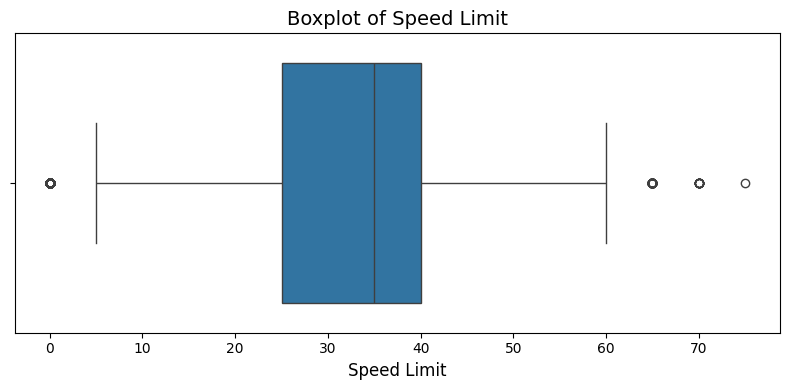

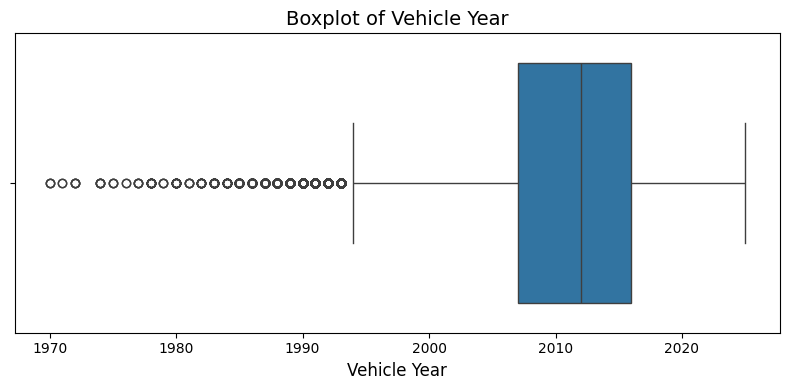

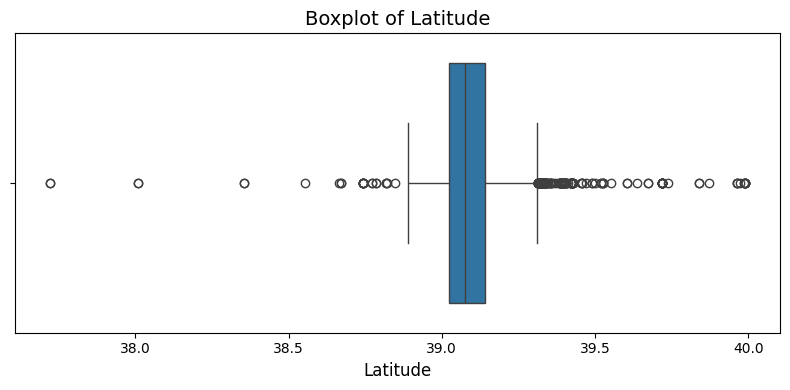

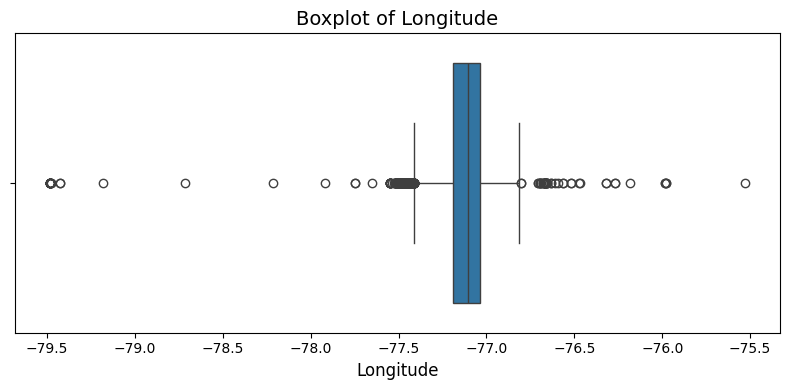

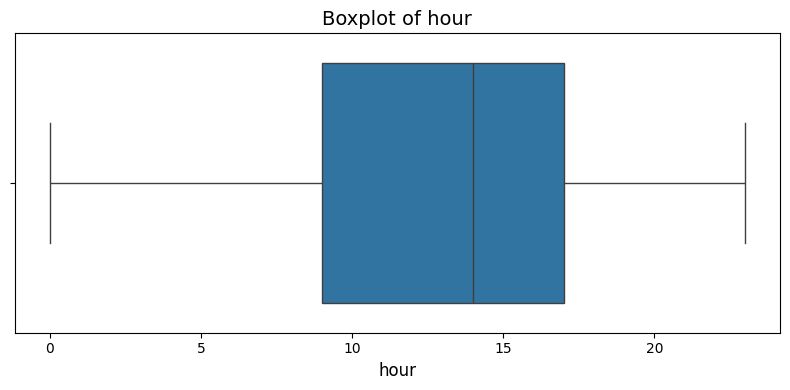

In [108]:
# loop and plot
for col in num:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

### Outlier Treatment using IQR Capping  
We apply the Interquartile Range (IQR) method to cap extreme outliers in all numerical columns.  
This prevents extreme values from hurting model performance while maintaining the original data distribution.

In [109]:
# ---- Outlier Capping for All Numerical Columns (IQR Method) ----


num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # define lower & upper caps
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR

    # apply capping
    df[col] = df[col].clip(lower=lower_cap, upper=upper_cap)

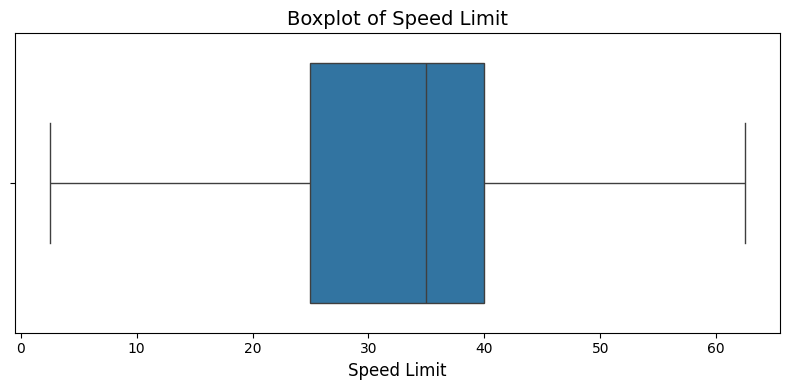

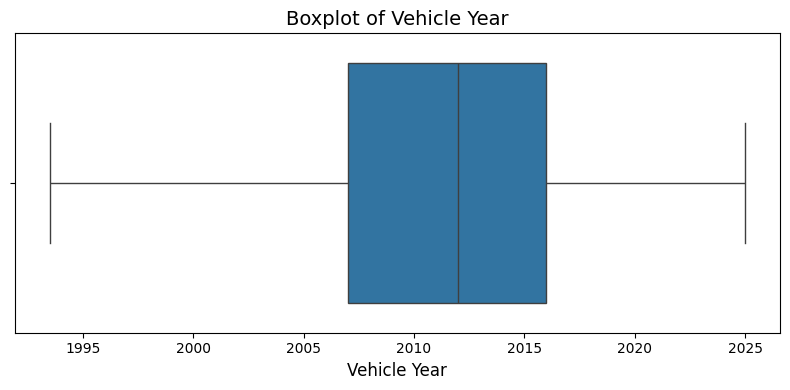

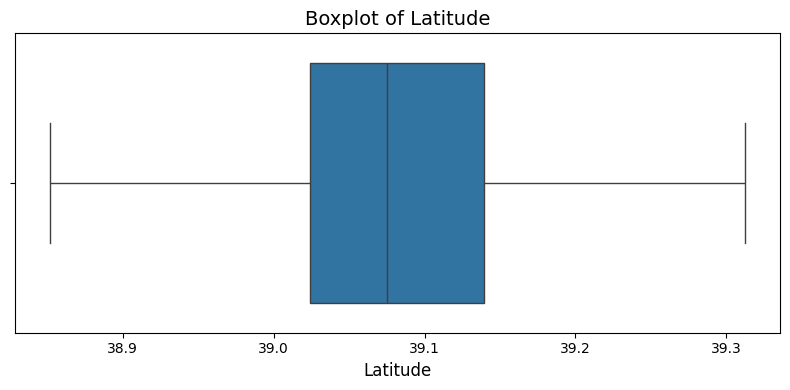

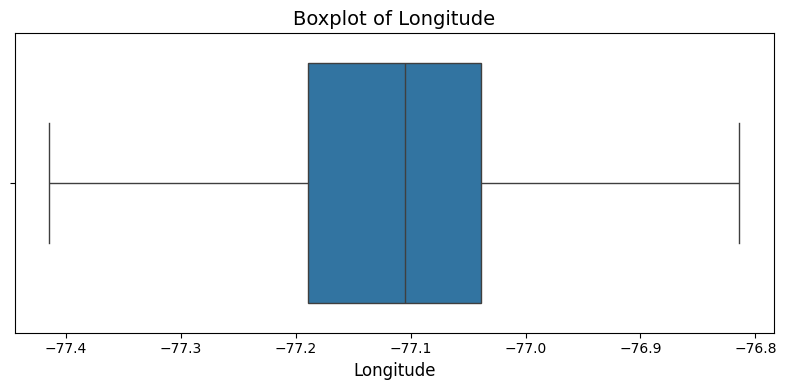

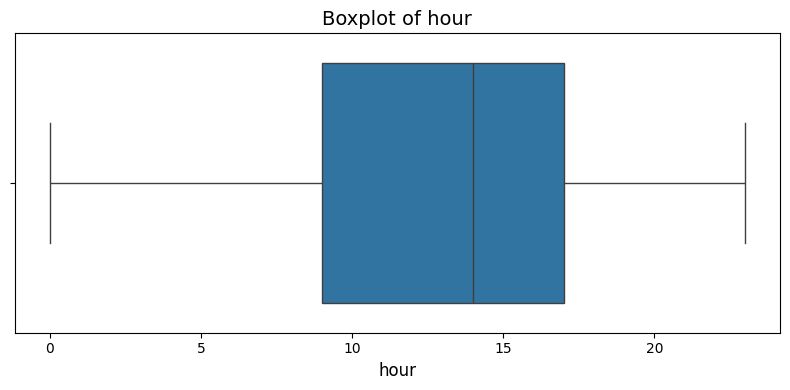

In [110]:
# loop and plot
for col in num:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

## Feature Engineering (Crash Date/Time)

In [111]:
df['Crash_year'] = df['Crash Date/Time'].dt.year
df['Crash_month'] = df['Crash Date/Time'].dt.month
df['Crash_day'] = df['Crash Date/Time'].dt.day
df['Crash_hour'] = df['Crash Date/Time'].dt.hour
df['Crash_day_name'] = df['Crash Date/Time'].dt.day_name()
df['Crash_date'] = df['Crash Date/Time'].dt.date
df['Crash_week'] = df['Crash Date/Time'].dt.isocalendar().week

| Visualization             | Purpose                              |
| ------------------------- | ------------------------------------ |
| **Hour-wise bar chart**   | Peak accident time                   |
| **Day-of-week bar chart** | Weekday vs weekend patterns          |
| **Month-wise bar chart**  | Seasonal effects                     |
| **Yearly trend line**     | Crash increase/decrease              |
| **Hour × day heatmap**    | Most powerful pattern extraction     |
| **Daily line trend**      | Detect anomalies or special patterns |

### Why We Use IQR Capping — Conclusion  
IQR capping helps remove the influence of extreme outliers that can distort statistical measures  
(mean, variance) and reduce machine-learning model accuracy.  
By capping values instead of removing rows, we keep maximum data while still controlling outlier impact.  
This makes the dataset more stable, less noisy, and better suited for modeling.

In [112]:
df.dtypes

Report Number                            object
Local Case Number                        object
Agency Name                              object
ACRS Report Type                         object
Crash Date/Time                  datetime64[ns]
Route Type                               object
Road Name                                object
Cross-Street Name                        object
Collision Type                           object
Weather                                  object
Surface Condition                        object
Light                                    object
Traffic Control                          object
Driver Substance Abuse                   object
Person ID                                object
Driver At Fault                          object
Injury Severity                          object
Driver Distracted By                     object
Drivers License State                    object
Vehicle ID                               object
Vehicle Damage Extent                    object
Vehicle First Impact Location            object
Vehicle Body Type                        object
Vehicle Movement                         object
Vehicle Going Dir                        object
Speed Limit                             float64
Driverless Vehicle                       object
Parked Vehicle                           object
Vehicle Year                            float64
Vehicle Make                             object
Latitude                                float64
Longitude                               float64
Vehicle Model                            object
Circumstance_Category                    object
hour                                      Int32
Crash_year                                int32
Crash_month                               int32
Crash_day                                 int32
Crash_hour                                int32
Crash_day_name                           object
Crash_date                               object
Crash_week                               UInt32
dtype: object

In [113]:
df.to_excel('/content/drive/MyDrive/CAPSTONE/CAPSTONE_PROJECT/0_dataset/2_CLEANED DATASET/FULLY_CLEANED DATASET.xlsx')

In [114]:
df.dtypes

Report Number                            object
Local Case Number                        object
Agency Name                              object
ACRS Report Type                         object
Crash Date/Time                  datetime64[ns]
Route Type                               object
Road Name                                object
Cross-Street Name                        object
Collision Type                           object
Weather                                  object
Surface Condition                        object
Light                                    object
Traffic Control                          object
Driver Substance Abuse                   object
Person ID                                object
Driver At Fault                          object
Injury Severity                          object
Driver Distracted By                     object
Drivers License State                    object
Vehicle ID                               object
Vehicle Damage Extent                    object
Vehicle First Impact Location            object
Vehicle Body Type                        object
Vehicle Movement                         object
Vehicle Going Dir                        object
Speed Limit                             float64
Driverless Vehicle                       object
Parked Vehicle                           object
Vehicle Year                            float64
Vehicle Make                             object
Latitude                                float64
Longitude                               float64
Vehicle Model                            object
Circumstance_Category                    object
hour                                      Int32
Crash_year                                int32
Crash_month                               int32
Crash_day                                 int32
Crash_hour                                int32
Crash_day_name                           object
Crash_date                               object
Crash_week                               UInt32
dtype: object

## Data Cleaning and Preparation Report

This report summarizes the steps taken to clean and prepare the dataset, focusing on null value treatment, data type conversion, and outlier handling.

### 1. Null Value Treatment

Missing values were addressed using a combination of rule-based imputation, probabilistic filling based on existing data distributions, and a model-based approach for the `Circumstance_Category`.

- **Parked Vehicle**: Initially had 1526 nulls. Filled using logical rules (e.g., driverless vehicle implies parked, crash type) and then mode imputation.
- **Collision Type**: Initially had 1552 nulls. Filled using logical rules (e.g., parked vehicle, single-vehicle crash, at-fault driver, speed) and then mode imputation.
- **Injury Severity**: Initially had 2231 nulls. Filled using logical rules (e.g., parked vehicle, collision type, speed) and then probabilistic imputation based on its distribution.
- **Light**: Initially had 2264 nulls. Filled using logical rules (e.g., crash hour, injury severity, collision type, parked vehicle, speed) and then probabilistic imputation.
- **Vehicle First Impact Location**: Initially had 3238 nulls. Filled using logical rules (e.g., parked vehicle, collision type, speed, injury severity, light conditions) and then probabilistic imputation.
- **Vehicle Body Type**: Initially had 4304 nulls. Filled using logical rules (e.g., parked vehicle, collision type, speed, injury severity, light conditions) and then probabilistic imputation.
- **Vehicle Movement**: Initially had approximately 4335 nulls. Filled using logical rules (e.g., parked vehicle, collision type, impact location, speed, light, injury severity) and then probabilistic imputation.
- **Vehicle Year**: Initially had 5258 nulls. Filled using probabilistic imputation, followed by a logical correction to ensure the vehicle year is not newer than the crash year.
- **Vehicle Damage Extent**: Initially had 6936 nulls. Filled using logical rules (e.g., injury severity, collision type, speed, parked vehicle, impact location, vehicle year, body type) and then probabilistic imputation.
- **Agency Name**: Initially had 7841 nulls. Filled using probabilistic imputation.
- **Vehicle Going Dir**: Initially had 8555 nulls. Filled using probabilistic imputation.
- **Drivers License State**: Initially had 13755 nulls. Filled using probabilistic imputation.
- **Weather**: Initially had 14270 nulls. Filled using probabilistic imputation.
- **Route Type**: Initially had 20139 nulls. Filled using probabilistic imputation.
- **Road Name**: Initially had 23289 nulls. Filled using probabilistic imputation.
- **Surface Condition**: Initially had 23930 nulls. Filled using logical rules (e.g., weather conditions, vehicle movement, light conditions, parked vehicle, speed) and then probabilistic imputation.
- **Traffic Control**: Initially had 28855 nulls. Filled using probabilistic imputation.
- **Cross-Street Name**: Initially had 37110 nulls. Filled using probabilistic imputation.
- **Vehicle Make**: Initially had 41137 nulls. Filled using probabilistic imputation, followed by a correction to align with the extracted brand from 'Vehicle Model'.
- **Driver Distracted By**: Initially had 43095 nulls. Filled using logical rules (e.g., collision type, parked vehicle, light conditions, speed, vehicle movement, injury severity) and then probabilistic imputation.
- **Driver Substance Abuse**: Initially had 47030 nulls. Filled using probabilistic imputation.
- **Vehicle Model**: Initially had 91246 nulls. Filled by mapping based on 'Vehicle Make' and then using probabilistic imputation.
- **Circumstance_Category**: Initially had 167848 nulls. Imputed using an XGBoost classifier, leveraging various other crash, vehicle, environmental, and driver features. This provided a more realistic and context-aware imputation.

### 2. Datatype Detection and Treatment

Data types were reviewed and adjusted to ensure consistency and correctness for analysis and modeling. Key changes included:

- `Crash Date/Time`: Ensured conversion to datetime format.
- `Speed Limit`: Converted to numeric (int64) and later adjusted to float64 after outlier capping.
- `Vehicle Year`: Converted to int64 and later adjusted to float64 after outlier capping.
- `Latitude`, `Longitude`: Converted to float64.
- `hour`: Converted to Int32.
- Binary categorical columns (`Driver At Fault`, `Driverless Vehicle`, `Parked Vehicle`): Explicitly set to object type.
- All other string-based categorical columns were explicitly set to object type.

### 3. Outlier Treatment

Outliers in numerical columns were identified and treated using the Interquartile Range (IQR) capping method to prevent extreme values from distorting analysis and model performance. This method preserves data distribution while limiting the impact of anomalies.

- **Method**: IQR Capping. Values outside the range of `Q1 - 1.5 * IQR` and `Q3 + 1.5 * IQR` were capped to these lower and upper limits respectively.
- **Columns Treated**: `Speed Limit`, `Vehicle Year`, `Latitude`, `Longitude`, `hour`.

### Tabular Summary

#### Null Value Treatment Summary

| Column                        | Before Null Count | After Null Count | Treatment Strategy                                                                                             |
|-------------------------------|-------------------|------------------|------------------------------------------------------------------------------------------------------------------------|
| Circumstance_Category         | 167848            | 0                | Model-based (XGBoost) imputation using multiple related features.                                                    |
| Vehicle Model                 | 91246             | 0                | Mapped from Vehicle Make, then probabilistic fill.                                                                     |
| Driver Substance Abuse        | 47030             | 0                | Probabilistic fill.                                                                                                    |
| Driver Distracted By          | 43095             | 0                | Rule-based (collision type, parked vehicle, light, speed, vehicle movement, injury severity) then probabilistic fill.  |
| Vehicle Make                  | 41137             | 0                | Probabilistic fill, then corrected based on Vehicle Model.                                                             |
| Cross-Street Name             | 37110             | 0                | Probabilistic fill.                                                                                                    |
| Traffic Control               | 28855             | 0                | Probabilistic fill.                                                                                                    |
| Surface Condition             | 23930             | 0                | Rule-based (weather, vehicle movement, light, parked vehicle, speed) then probabilistic fill.                          |
| Road Name                     | 23289             | 0                | Probabilistic fill.                                                                                                    |
| Route Type                    | 20139             | 0                | Probabilistic fill.                                                                                                    |
| Weather                       | 14270             | 0                | Probabilistic fill.                                                                                                    |
| Drivers License State         | 13755             | 0                | Probabilistic fill.                                                                                                    |
| Vehicle Going Dir             | 8555              | 0                | Probabilistic fill.                                                                                                    |
| Agency Name                   | 7841              | 0                | Probabilistic fill.                                                                                                    |
| Vehicle Damage Extent         | 6936              | 0                | Rule-based (injury severity, collision type, speed, parked vehicle, impact location, vehicle year, body type) then probabilistic fill. |
| Vehicle Year                  | 5258              | 0                | Probabilistic fill, then logical correction (Vehicle Year <= Crash Year).                                              |
| Vehicle Movement              | 4335             | 0                | Rule-based (parked vehicle, collision type, impact location, speed, light, injury severity) then probabilistic fill.  |
| Vehicle Body Type             | 4304              | 0                | Rule-based (parked vehicle, collision type, speed, injury severity, light) then probabilistic fill.                    |
| Vehicle First Impact Location | 3238              | 0                | Rule-based (parked vehicle, collision type, speed, injury severity, light conditions) then probabilistic fill.         |
| Light                         | 2264              | 0                | Rule-based (crash hour, injury severity, collision type, parked vehicle, speed) then probabilistic fill.               |
| Injury Severity               | 2231              | 0                | Rule-based (parked vehicle, collision type, speed) then probabilistic fill.                                            |
| Collision Type                | 1552              | 0                | Rule-based (parked vehicle, single vehicle, at fault, speed) then mode fill.                                           |
| Parked Vehicle                | 1526              | 0                | Rule-based (driverless vehicle, at fault, speed, crash type) then mode fill.                                           |

#### Datatype Treatment Summary

| Column                        | Initial Datatype     | Final Datatype   |
|-------------------------------|----------------------|------------------|
| Report Number                 | object               | object           |
| Local Case Number             | object               | object           |
| Agency Name                   | object               | object           |
| ACRS Report Type              | object               | object           |
| Crash Date/Time               | datetime64[ns]       | datetime64[ns]   |
| Route Type                    | object               | object           |
| Road Name                     | object               | object           |
| Cross-Street Name             | object               | object           |
| Collision Type                | object               | object           |
| Circumstance_Category         | object               | object           |
| Weather                       | object               | object           |
| Surface Condition             | object               | object           |
| Light                         | object               | object           |
| Traffic Control               | object               | object           |
| Driver Substance Abuse        | object               | object           |
| Person ID                     | object               | object           |
| Driver At Fault               | object               | object           |
| Injury Severity               | object               | object           |
| Driver Distracted By          | object               | object           |
| Drivers License State         | object               | object           |
| Vehicle ID                    | object               | object           |
| Vehicle Damage Extent         | object               | object           |
| Vehicle First Impact Location | object               | object           |
| Vehicle Body Type             | object               | object           |
| Vehicle Movement              | object               | object           |
| Vehicle Going Dir             | object               | object           |
| Speed Limit                   | int64                | float64          |
| Driverless Vehicle            | object               | object           |
| Parked Vehicle                | object               | object           |
| Vehicle Year                  | float64              | int64          |
| Vehicle Make                  | object               | object           |
| Latitude                      | float64              | float64          |
| Longitude                     | float64              | float64          |
| Vehicle Model                 | object               | object           |
| hour                          | Int32                | Int32            |

#### Outlier Treatment Summary

| Column          | Treatment Method |
|-----------------|------------------|
| Speed Limit     | IQR Capping      |
| Vehicle Year    | IQR Capping      |
| Latitude        | IQR Capping      |
| Longitude       | IQR Capping      |
| hour            | IQR Capping      |
